# XYZcrop_lending Data

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_table(r"C:\Users\91949\Desktop\XYZCorp_LendingData.txt",low_memory=False,delimiter="\t", header=0)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.shape

(855969, 73)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
data.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [7]:
train=data.iloc[0:450000,:]
test=data.iloc[450000:,0:72]
train.shape

(450000, 73)

In [8]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
450000,10071047,11922478,15000.0,15000.0,15000.0,60 months,16.24,366.69,C,C5,Sr. Regional Manager,2 years,RENT,120000.0,Source Verified,Jan-2014,n,NaN,debt_consolidation,Debt Consolidation,770xx,TX,17.63,0.0,Aug-2004,0.0,36.0,NaN,23.0,0.0,14805.0,50.0,35.0,f,10394.81,10394.81,8800.520000,8800.52,4605.19,4195.33,0.0,0.0,0.0,Jan-2016,366.69,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,90.0,280698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29600.0,NaN,NaN,NaN
450001,10071008,11922448,7200.0,7200.0,7200.0,36 months,13.98,246.01,C,C1,Treasury Analyst,8 years,MORTGAGE,90000.0,Source Verified,Jan-2014,n,Borrower added on 01/03/14 > I am requested ...,debt_consolidation,Debt Consolidation,068xx,CT,9.41,2.0,May-1995,2.0,12.0,55.0,10.0,2.0,3734.0,53.3,33.0,f,2740.38,2740.38,5903.920000,5903.92,4459.62,1444.30,0.0,0.0,0.0,Jan-2016,246.01,Feb-2016,Jan-2016,0.0,20.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,4723.0,412992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,NaN
450002,8655233,10427340,12000.0,12000.0,11950.0,36 months,9.67,385.35,B,B1,Director,10+ years,MORTGAGE,99000.0,Verified,Jan-2014,n,Borrower added on 01/03/14 > paying off my o...,debt_consolidation,lowering lending club payment,721xx,AR,22.36,1.0,Feb-1998,0.0,17.0,NaN,5.0,0.0,1250.0,62.5,20.0,f,0.00,0.00,13141.246926,13086.49,12000.00,1141.25,0.0,0.0,0.0,Mar-2015,8132.31,NaN,Mar-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,286.0,196153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
450003,10071069,11922493,4500.0,4500.0,4500.0,36 months,14.98,155.95,C,C3,Sales Merchandiser,3 years,MORTGAGE,28000.0,Verified,Jan-2014,n,Borrower added on 01/03/14 > Debt consolidat...,debt_consolidation,Consolidation,781xx,TX,24.56,0.0,Sep-1999,2.0,NaN,NaN,13.0,0.0,8350.0,69.0,17.0,f,1728.14,1728.14,3742.580000,3742.58,2771.86,970.72,0.0,0.0,0.0,Jan-2016,155.95,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,20974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12100.0,NaN,NaN,NaN
450004,10069685,11921275,8000.0,8000.0,8000.0,36 months,14.98,277.25,C,C3,IT Manager,< 1 year,MORTGAGE,75000.0,Source Verified,Jan-2014,n,NaN,debt_consolidation,Debt consolidation,773xx,TX,14.43,1.0,Jun-2003,0.0,2.0,NaN,13.0,0.0,10885.0,77.2,27.0,f,0.00,0.00,9677.180000,9677.18,8000.00,1677.18,0.0,0.0,0.0,Nov-2015,3854.93,NaN,Jan-2016,0.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,1.0,0.0,136246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN


# Cleaning-Train Data

In [10]:
#Droping missing value columns having more than 50% null values
train=train.drop(["id","member_id","inq_last_12m","total_cu_tl","inq_fi","all_util","max_bal_bc","open_rv_24m","open_rv_12m","il_util","total_bal_il","mths_since_rcnt_il","open_il_24m","open_il_12m","open_il_6m","open_acc_6m","verification_status_joint","dti_joint","annual_inc_joint","mths_since_last_major_derog","mths_since_last_record","mths_since_last_delinq","desc","next_pymnt_d"],axis=1)

In [11]:
train.shape

(450000, 49)

In [12]:
train.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     26487
emp_length                    20260
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            18
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      290
total_acc                   

In [13]:
train.emp_title.value_counts()

Teacher                            5190
Manager                            4273
Registered Nurse                   2237
RN                                 2130
Supervisor                         1887
                                   ... 
Jones County Board of Education       1
Taco John's International             1
Walker's Service                      1
apcco                                 1
Project Controller                    1
Name: emp_title, Length: 199759, dtype: int64

In [14]:
train.emp_title=train.emp_title.fillna("Admissions Producer")

In [15]:
train.emp_length.value_counts()

10+ years    145263
2 years       39870
3 years       35246
< 1 year      34703
5 years       29770
1 year        28448
4 years       27075
7 years       25342
6 years       25211
8 years       21609
9 years       17203
Name: emp_length, dtype: int64

In [16]:
train.emp_length=train.emp_length.fillna("9 years")

In [17]:
train.title.value_counts()

Debt consolidation                          158333
Credit card refinancing                      60506
Debt Consolidation                           15325
Home improvement                             14340
Other                                        12279
                                             ...  
A Solid Consolidation                            1
front porch                                      1
Refinance current LC Loan plus Med Bills         1
Home Improvement/Roof                            1
Refinance Debt                                   1
Name: title, Length: 60584, dtype: int64

In [18]:
train.title=train.title.fillna("Refinance Debt")

In [19]:
train.revol_util.value_counts()

0.00     2169
58.00     837
53.00     820
59.00     805
61.00     802
         ... 
26.33       1
81.31       1
2.64        1
0.75        1
33.39       1
Name: revol_util, Length: 1251, dtype: int64

In [20]:
train.revol_util=train.revol_util.fillna(train.revol_util.median())

In [21]:
train.last_pymnt_d.value_counts()

Jan-2016    176707
Dec-2015     57713
Jul-2015     11623
Mar-2015     10028
Jun-2015     10020
             ...  
Jun-2008        10
Nov-2008        10
Mar-2008         5
Jan-2008         4
Feb-2008         1
Name: last_pymnt_d, Length: 97, dtype: int64

In [22]:
train.last_pymnt_d=train.last_pymnt_d.fillna("Feb-2008")

In [23]:
train.last_credit_pull_d.value_counts()

Jan-2016    314163
Dec-2015     13842
Nov-2015      8280
Sep-2015      7922
Oct-2015      7832
             ...  
May-2008         1
Jun-2008         1
Jul-2008         1
May-2007         1
Jul-2007         1
Name: last_credit_pull_d, Length: 102, dtype: int64

In [24]:
train.last_credit_pull_d=train.last_credit_pull_d.fillna("Jul-2007")

In [25]:
train.collections_12_mths_ex_med.value_counts()

0.0     446193
1.0       3509
2.0        214
3.0         18
4.0          6
6.0          1
16.0         1
20.0         1
5.0          1
Name: collections_12_mths_ex_med, dtype: int64

In [26]:
train.collections_12_mths_ex_med=train.collections_12_mths_ex_med.fillna(5.0)

In [27]:
train.total_rev_hi_lim.value_counts()

15000.0    1339
13500.0    1272
10000.0    1262
12000.0    1257
14500.0    1245
           ... 
30240.0       1
70701.0       1
15511.0       1
15428.0       1
96310.0       1
Name: total_rev_hi_lim, Length: 14384, dtype: int64

In [28]:
train.total_rev_hi_lim=train.total_rev_hi_lim.fillna(train.total_rev_hi_lim.median())

In [29]:
train.tot_cur_bal.value_counts()

0.0         75
23254.0     15
14186.0     14
30491.0     14
28674.0     14
            ..
144322.0     1
400815.0     1
314452.0     1
207170.0     1
101575.0     1
Name: tot_cur_bal, Length: 216304, dtype: int64

In [30]:
train.tot_cur_bal=train.tot_cur_bal.fillna(train.tot_cur_bal.median())

In [31]:
train.tot_coll_amt.value_counts()

0.0        334933
50.0          800
100.0         620
75.0          492
60.0          296
            ...  
21500.0         1
15729.0         1
7214.0          1
4077.0          1
9986.0          1
Name: tot_coll_amt, Length: 6180, dtype: int64

In [32]:
train.tot_coll_amt=train.tot_coll_amt.fillna(train.tot_coll_amt.median())

In [33]:
train.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

# Convert Categorical Value To Numerical Value

In [34]:
train.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
train.term=le.fit_transform(train.term)

In [37]:
train.grade=le.fit_transform(train.grade)

In [38]:
train.sub_grade=le.fit_transform(train.sub_grade)

In [39]:
train.emp_title=le.fit_transform(train.emp_title)

In [40]:
train.emp_length=le.fit_transform(train.emp_length)

In [41]:
train.home_ownership=le.fit_transform(train.home_ownership)

In [42]:
train.verification_status=le.fit_transform(train.verification_status)

In [43]:
train.issue_d=le.fit_transform(train.issue_d)

In [44]:
train.pymnt_plan=le.fit_transform(train.pymnt_plan)

In [45]:
train.purpose=le.fit_transform(train.purpose)

In [46]:
train.title=le.fit_transform(train.title)

In [47]:
train.zip_code=le.fit_transform(train.zip_code)

In [48]:
train.addr_state=le.fit_transform(train.addr_state)

In [49]:
train.earliest_cr_line=le.fit_transform(train.earliest_cr_line)

In [50]:
train.initial_list_status=le.fit_transform(train.initial_list_status)

In [51]:
train.last_pymnt_d=le.fit_transform(train.last_pymnt_d)

In [52]:
train.last_credit_pull_d=le.fit_transform(train.last_credit_pull_d)

In [53]:
train.application_type=le.fit_transform(train.application_type)

In [54]:
train.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
issue_d                         int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                        int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int32
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

# Test Data Cleaning Part

In [55]:
test=test.drop(["id","member_id","inq_last_12m","total_cu_tl","inq_fi","all_util","max_bal_bc","open_rv_24m","open_rv_12m","il_util","total_bal_il","mths_since_rcnt_il","open_il_24m","open_il_12m","open_il_6m","open_acc_6m","verification_status_joint","dti_joint","annual_inc_joint","mths_since_last_major_derog","mths_since_last_record","mths_since_last_delinq","desc","next_pymnt_d"],axis=1)

In [56]:
test.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     22956
emp_length                    22801
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            15
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      156
total_acc                   

In [57]:
test.emp_title.value_counts()

Teacher                            7775
Manager                            6548
Owner                              3685
Registered Nurse                   3104
RN                                 3052
                                   ... 
State Parole Agent                    1
NURSING AID & COUNCILOR               1
Sr Systems Technician                 1
Consultant-lawyer                     1
Manager Hotel Operations Oasis        1
Name: emp_title, Length: 117250, dtype: int64

In [58]:
test.emp_title=test.emp_title.fillna("Manager Hotel Operations Oasis")

In [59]:
test.emp_length.value_counts()

10+ years    136827
2 years       36116
< 1 year      32894
3 years       32146
1 year        26407
5 years       24042
4 years       23568
8 years       20812
7 years       17862
9 years       16259
6 years       16235
Name: emp_length, dtype: int64

In [60]:
test.emp_length=test.emp_length.fillna("6 years")

In [61]:
test.title.value_counts()

Debt consolidation                239756
Credit card refinancing            98722
Home improvement                   24293
Other                              18243
Major purchase                      7061
                                   ...  
To put all debt in one payment         1
Finite                                 1
Debt Consoildation                     1
Refinance Loan                         1
Student Loan                           1
Name: title, Length: 1000, dtype: int64

In [62]:
test.title=test.title.fillna("Student Loan")

In [63]:
test.revol_util.value_counts()

0.0      1192
59.0      889
52.0      887
58.0      886
53.0      882
         ... 
118.6       1
182.8       1
126.0       1
145.8       1
184.6       1
Name: revol_util, Length: 1205, dtype: int64

In [64]:
test.revol_util=test.revol_util.fillna(test.revol_util.median())

In [65]:
test.last_pymnt_d.value_counts()

Jan-2016    290803
Dec-2015     85070
Oct-2015      3366
Nov-2015      3255
Aug-2015      3143
Jul-2015      2849
Sep-2015      2808
Jun-2015      1957
May-2015      1500
Apr-2015      1121
Mar-2015       727
Feb-2015       408
Jan-2015        88
Oct-2014        53
Jun-2014        43
Sep-2014        37
Jul-2014        37
Nov-2014        36
Dec-2014        35
Aug-2014        35
Apr-2014        32
Feb-2014        28
May-2014        24
Mar-2014        14
Name: last_pymnt_d, dtype: int64

In [66]:
test.last_pymnt_d=test.last_pymnt_d.fillna("Mar-2014")

In [67]:
test.last_credit_pull_d.value_counts()

Jan-2016    387524
Dec-2015      5197
Nov-2015      3108
Oct-2015      2458
Sep-2015      2063
Aug-2015      1431
Jul-2015      1328
Jun-2015       935
May-2015       595
Apr-2015       491
Mar-2015       326
Feb-2015       204
Jan-2015       152
Dec-2014        33
Nov-2014        19
Oct-2014        18
Sep-2014        16
Jun-2014        14
Aug-2014        12
Jul-2014         9
May-2014         9
Apr-2014         7
Feb-2014         5
Mar-2014         3
Jan-2014         2
Name: last_credit_pull_d, dtype: int64

In [68]:
test.last_credit_pull_d=test.last_credit_pull_d.fillna("Jan-2014")

In [69]:
#test.isnull().sum()

# Convert Categorical Value To Numerical Value

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [71]:
test.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [72]:
test.term=le.fit_transform(test.term)

In [73]:
test.grade=le.fit_transform(test.grade)

In [74]:
test.sub_grade=le.fit_transform(test.sub_grade)

In [75]:
test.emp_title=le.fit_transform(test.emp_title)

In [76]:
test.emp_length=le.fit_transform(test.emp_length)

In [77]:
test.home_ownership=le.fit_transform(test.home_ownership)

In [78]:
test.verification_status=le.fit_transform(test.verification_status)

In [79]:
test.issue_d=le.fit_transform(test.issue_d)

In [80]:
test.pymnt_plan=le.fit_transform(test.pymnt_plan)

In [81]:
test.purpose=le.fit_transform(test.purpose)

In [82]:
test.title=le.fit_transform(test.title)

In [83]:
test.zip_code=le.fit_transform(test.zip_code)

In [84]:
test.addr_state=le.fit_transform(test.addr_state)

In [85]:
test.earliest_cr_line=le.fit_transform(test.earliest_cr_line)

In [86]:
test.initial_list_status=le.fit_transform(test.initial_list_status)

In [87]:
test.last_pymnt_d=le.fit_transform(test.last_pymnt_d)

In [88]:
test.last_credit_pull_d=le.fit_transform(test.last_credit_pull_d)

In [89]:
test.application_type=le.fit_transform(test.application_type)

In [90]:
test.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
issue_d                         int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                        int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int32
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [91]:
corr = train.corr()
corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
loan_amnt,1.000000,0.998553,0.995297,0.412384,0.165195,0.949588,0.165581,0.173379,-0.003847,-0.073513,-0.206785,0.369891,0.364541,-0.002429,0.001060,-0.154457,-0.123353,-0.008709,0.019137,0.056215,0.005707,-0.013635,-0.010105,0.203921,-0.081747,0.338654,0.116937,0.234161,0.074151,0.510426,0.510386,0.745412,0.745170,0.616749,0.714220,0.037776,0.113809,0.081287,-0.033587,0.309187,-0.024482,-0.012201,NaN,NaN,0.006409,-0.002015,0.320978,0.275491,0.008691
funded_amnt,0.998553,1.000000,0.997026,0.410321,0.165951,0.951719,0.165347,0.172992,-0.003508,-0.073541,-0.206564,0.369367,0.363737,-0.002415,0.001070,-0.156099,-0.124677,-0.008612,0.019385,0.057577,0.006263,-0.013506,-0.010420,0.204771,-0.081202,0.338389,0.118087,0.234071,0.076497,0.513137,0.513099,0.744943,0.745003,0.616306,0.713984,0.037375,0.113496,0.081164,-0.033900,0.309136,-0.024989,-0.011980,NaN,NaN,0.006595,-0.001982,0.322504,0.276475,0.007810
funded_amnt_inv,0.995297,0.997026,1.000000,0.410958,0.167592,0.948493,0.164223,0.171803,-0.003090,-0.073558,-0.206628,0.367785,0.364701,0.000083,0.001053,-0.159444,-0.127503,-0.008306,0.019610,0.060915,0.007040,-0.013289,-0.011951,0.205694,-0.079805,0.337195,0.120045,0.234416,0.081193,0.516321,0.516293,0.740523,0.746302,0.611840,0.712280,0.033939,0.111908,0.078787,-0.034269,0.308159,-0.025551,-0.014380,NaN,NaN,0.006924,-0.001906,0.323926,0.277036,0.005038
term,0.412384,0.410321,0.410958,1.000000,0.442231,0.158762,0.455667,0.467128,0.016314,-0.044202,-0.120664,0.069907,0.261645,0.022949,-0.000157,-0.040834,-0.050923,-0.031514,0.025140,0.090797,0.003942,-0.002038,0.016280,0.077318,-0.022322,0.097037,0.083714,0.100834,0.100856,0.427935,0.427904,0.176996,0.178518,0.014396,0.533217,0.009006,0.093185,0.059170,-0.046428,0.115772,-0.027899,-0.002475,NaN,NaN,0.007638,-0.001458,0.115336,0.059706,0.059222
int_rate,0.165195,0.165951,0.167592,0.442231,1.000000,0.146893,0.954545,0.976903,0.020998,-0.005822,0.064194,-0.046941,0.235869,-0.014666,0.000259,0.134982,0.048086,-0.003442,0.007240,0.159175,0.079897,0.002145,0.213884,0.010645,0.067440,-0.004338,0.325438,-0.034497,-0.009973,0.124475,0.124497,0.129617,0.131805,-0.026511,0.482172,0.052260,0.132394,0.086095,-0.001784,0.082557,-0.012625,0.013245,NaN,NaN,0.030750,0.001401,-0.072450,-0.125926,0.166455
installment,0.949588,0.951719,0.948493,0.158762,0.146893,1.000000,0.138702,0.145546,-0.006561,-0.064723,-0.171915,0.366949,0.333043,-0.012219,0.001527,-0.141977,-0.112344,0.000902,0.013123,0.048965,0.015923,-0.013495,0.012566,0.196561,-0.070884,0.326345,0.136322,0.214739,0.042064,0.400117,0.400089,0.765698,0.765531,0.666820,0.640111,0.046245,0.108545,0.078959,-0.018936,0.304732,-0.017712,-0.010368,NaN,NaN,0.009209,-0.001513,0.292629,0.257459,0.011351
grade,0.165581,0.165347,0.164223,0.455667,0.954545,0.138702,1.000000,0.977000,0.022489,-0.004760,0.061204,-0.038514,0.212917,-0.000865,0.000468,0.145573,0.024894,-0.008111,0.007213,0.147594,0.079909,0.002912,0.203841,0.012251,0.067377,-0.003005,0.295712,-0.029891,0.010865,0.156073,0.156103,0.100489,0.099733,-0.052268,0.459334,0.056201,0.126480,0.086119,-0.011608,0.069693,-0.016478,0.018509,NaN,NaN,0.030660,0.001263,-0.067768,-0.114321,0.156288
sub_grade,0.173379,0.172992,0.171803,0.467128,0.976903,0.145546,0.977000,1.000000,0.022961,-0.005099,0.063665,-0.038686,0.221631,-0.003140,0.000483,0.148641,0.024975,-0.007767,0.007743,0.152139,0.081

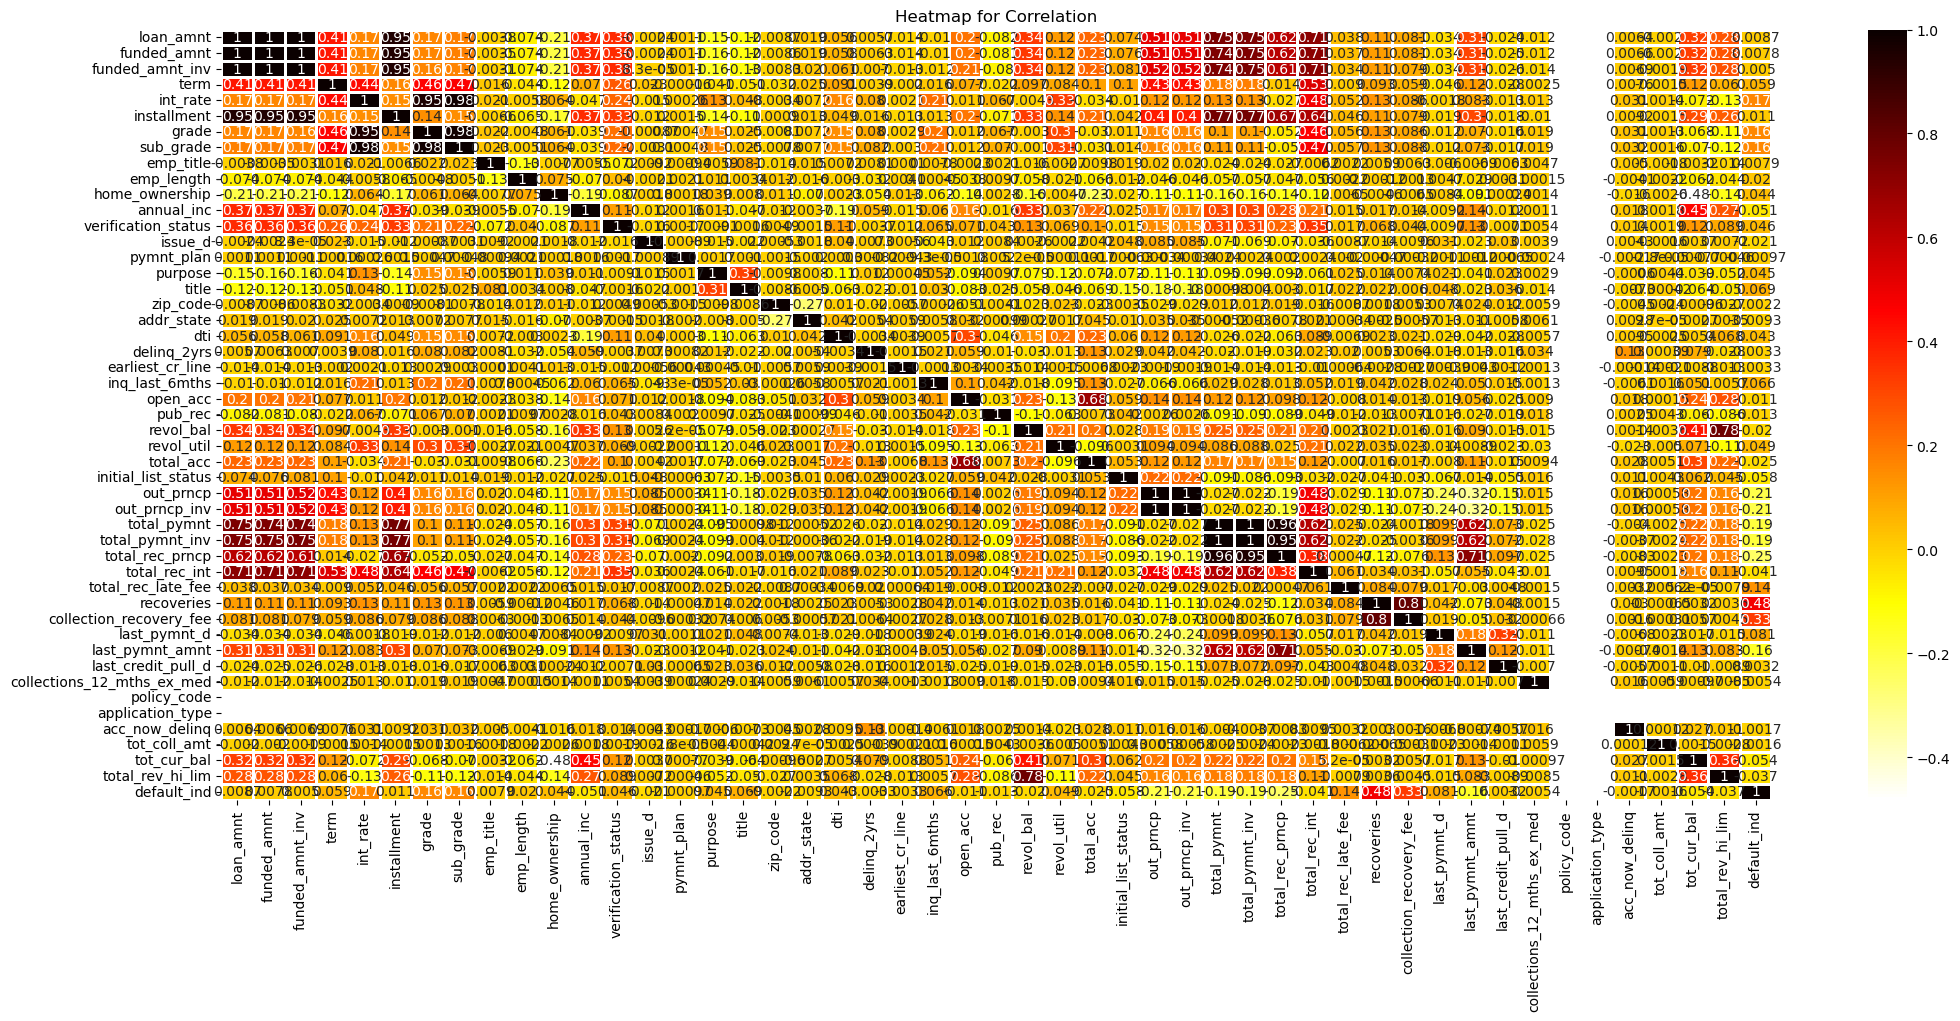

In [92]:
plt.figure(figsize=(25,10))
Heatmap=sns.heatmap(corr,linewidth=1,annot=True,cmap="hot_r")
plt.title("Heatmap for Correlation")
plt.show()

# Data Visualization

<AxesSubplot:xlabel='default_ind', ylabel='count'>

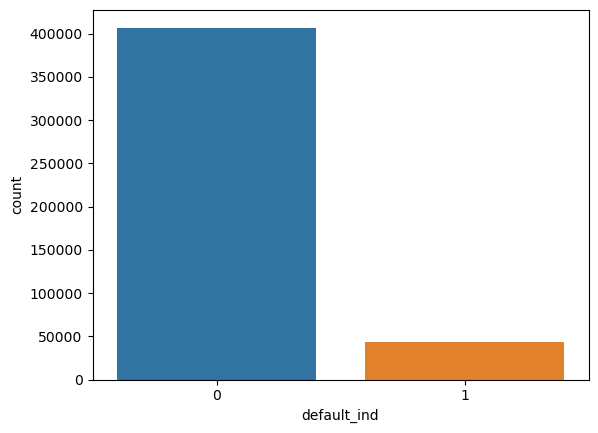

In [93]:
sns.countplot("default_ind",data=train)

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

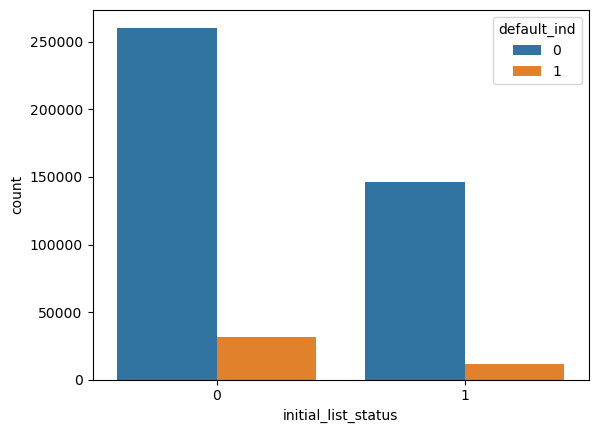

In [94]:
sns.countplot('initial_list_status',data=train,hue='default_ind')

<AxesSubplot:xlabel='verification_status', ylabel='count'>

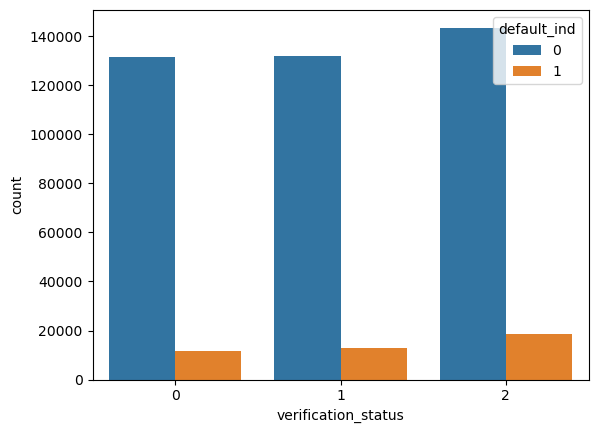

In [95]:
sns.countplot('verification_status',data=train,hue='default_ind')

# Model Building Without Treating Outliers

In [96]:
t_x=train.iloc[:,0:-1]
t_y=train.iloc[:,-1]

In [97]:
t_x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,5820,1,5,24000.0,2,19,0,1,8521,758,3,27.65,0.0,249,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,128177,10,5,30000.0,1,19,0,0,47819,285,10,1.00,0.0,39,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,99,0.0,1.0,0,0.0,0.0,82071.0,22900.0
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,5820,1,5,12252.0,0,19,0,11,58236,540,14,8.72,0.0,542,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,2175,1,5,49200.0,1,19,0,9,57923,802,4,20.00,0.0,197,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,161224,0,5,80000.0,1,19,0,9,37791,855,36,17.94,0.0,260,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0


In [98]:
t_y.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_tr,x_te,y_tr,y_te=train_test_split(t_x,t_y,test_size=0.2,random_state=50)

In [101]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((360000, 48), (90000, 48), (360000,), (90000,))

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [103]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [104]:
lg_p=lg.predict(x_te)

In [105]:
cf1=confusion_matrix(lg_p,y_te)
cf1

array([[81221,   334],
       [   42,  8403]], dtype=int64)

In [106]:
acc1=cf1.diagonal().sum()/cf1.sum()*100
acc1

99.58222222222223

In [107]:
lg_f1=f1_score(lg_p,y_te)
lg_f1

0.9781166336864161

In [108]:
lg_pe=precision_score(lg_p,y_te)
lg_pe

0.9617717752088818

In [109]:
lg_re=recall_score(lg_p,y_te)
lg_re

0.9950266429840142

In [110]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81555
           1       0.96      1.00      0.98      8445

    accuracy                           1.00     90000
   macro avg       0.98      1.00      0.99     90000
weighted avg       1.00      1.00      1.00     90000



# ROC Curve

In [111]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,lg_p)

Text(0.5, 1.0, 'ROC-Curve')

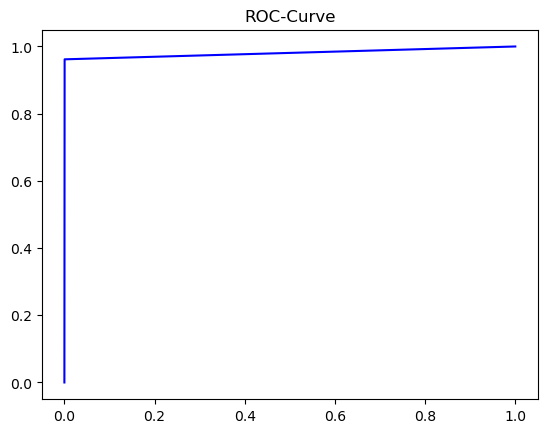

In [112]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [114]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [115]:
dt_p=dt.predict(x_te)

In [116]:
dt_cf=confusion_matrix(dt_p,y_te)
dt_cf

array([[81207,    56],
       [   56,  8681]], dtype=int64)

In [117]:
dt_f1=f1_score(dt_p,y_te)
dt_f1

0.9935904772805311

In [118]:
dt_pe=precision_score(dt_p,y_te)
dt_pe

0.9935904772805311

In [119]:
dt_re=recall_score(dt_p,y_te)
dt_re

0.9935904772805311

In [120]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

99.87555555555555

In [121]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81263
           1       0.99      0.99      0.99      8737

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [123]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [124]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
rf_cf=confusion_matrix(rf_p,y_te)
rf_cf

array([[81263,   113],
       [    0,  8624]], dtype=int64)

In [126]:
rf_f1=f1_score(rf_p,y_te)
rf_f1

0.9934911583434134

In [127]:
rf_pe=precision_score(rf_p,y_te)
rf_pe

0.9870664987982145

In [128]:
rf_re=recall_score(rf_p,y_te)
rf_re

1.0

In [129]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

99.87444444444445

In [130]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81376
           1       0.99      1.00      0.99      8624

    accuracy                           1.00     90000
   macro avg       0.99      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=40)

In [132]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=40)

In [133]:
k_p=knn.predict(x_te)

In [134]:
ck=confusion_matrix(k_p,y_te)
ck

array([[81261,  6921],
       [    2,  1816]], dtype=int64)

In [135]:
k_f1=f1_score(k_p,y_te)
k_f1

0.3441023211747987

In [136]:
k_pe=precision_score(k_p,y_te)
k_pe

0.20785166533134944

In [137]:
k_re=recall_score(k_p,y_te)
k_re

0.9988998899889989

In [138]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

92.30777777777777

In [139]:
print(classification_report(k_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     88182
           1       0.21      1.00      0.34      1818

    accuracy                           0.92     90000
   macro avg       0.60      0.96      0.65     90000
weighted avg       0.98      0.92      0.95     90000



# Support Vector Machine

In [140]:
from sklearn.svm import SVC
svc=SVC()

In [141]:
svc.fit(x_tr,y_tr)

SVC()

In [142]:
s_p=svc.predict(x_te)
s_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
cs=confusion_matrix(s_p,y_te)
cs

array([[81217,   998],
       [   46,  7739]], dtype=int64)

In [144]:
s_f1=f1_score(s_p,y_te)
s_f1

0.9368115240285679

In [145]:
s_pe=precision_score(s_p,y_te)
s_pe

0.8857731486780359

In [146]:
s_re=recall_score(s_p,y_te)
s_re

0.9940912010276172

In [147]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

98.83999999999999

In [148]:
print(classification_report(s_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     82215
           1       0.89      0.99      0.94      7785

    accuracy                           0.99     90000
   macro avg       0.94      0.99      0.97     90000
weighted avg       0.99      0.99      0.99     90000



# ADA Boost

In [149]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [150]:
adbo1=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2)

In [151]:
adbo1.fit(x_tr,y_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [152]:
ad_p1=adbo1.predict(x_te)
ad_p1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
ad_cf=confusion_matrix(ad_p1,y_te)
ad_cf

array([[81212,    54],
       [   51,  8683]], dtype=int64)

In [154]:
ad_f1=f1_score(ad_p1,y_te)
ad_f1

0.9939900406387728

In [155]:
ad_pe=precision_score(ad_p1,y_te)
ad_pe

0.9938193888062264

In [156]:
ad_re=recall_score(ad_p1,y_te)
ad_re

0.9941607510877032

In [157]:
ad_acc1=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc1

99.88333333333334

In [158]:
print(classification_report(ad_p1,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81266
           1       0.99      0.99      0.99      8734

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# XG Boost

In [159]:
from xgboost import XGBClassifier
xgb1=XGBClassifier()

In [160]:
xgb1.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [161]:
xgb1_p1=xgb1.predict(x_te)

In [162]:
xgb1_cf=confusion_matrix(xgb1_p1,y_te)
xgb1_cf

array([[81263,    33],
       [    0,  8704]], dtype=int64)

In [163]:
xgb_f1=f1_score(xgb1_p1,y_te)
xgb_f1

0.9981079066567284

In [164]:
xgb_pe=precision_score(xgb1_p1,y_te)
xgb_pe

0.9962229598260273

In [165]:
xgb_re=recall_score(xgb1_p1,y_te)
xgb_re

1.0

In [166]:
xgb1_acc1=xgb1_cf.diagonal().sum()/xgb1_cf.sum()*100
xgb1_acc1

99.96333333333334

In [167]:
print(classification_report(xgb1_p1,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81296
           1       1.00      1.00      1.00      8704

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# Navie Bayes

In [168]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [169]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [170]:
n_p=nb.predict(x_te)

In [171]:
nc=confusion_matrix(n_p,y_te)
nc

array([[63915,   766],
       [17348,  7971]], dtype=int64)

In [172]:
n_f1=f1_score(n_p,y_te)
n_f1

0.46811134601832266

In [173]:
n_pe=precision_score(n_p,y_te)
n_pe

0.9123268856586929

In [174]:
n_re=recall_score(n_p,y_te)
n_re

0.3148228603025396

In [175]:
n_ac=nc.diagonal().sum()/nc.sum()*100
n_ac

79.87333333333333

In [176]:
print(classification_report(n_p,y_te))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     64681
           1       0.91      0.31      0.47     25319

    accuracy                           0.80     90000
   macro avg       0.85      0.65      0.67     90000
weighted avg       0.82      0.80      0.76     90000



# Conclusion

In [177]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"]
list2=[acc1,dt_acc1,rf_acc,ad_acc1,xgb1_acc1,acc_s,kacc,n_ac]
list3=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,s_f1,k_f1,n_f1]
list4=[lg_pe,dt_pe,rf_pe,ad_pe,xgb_pe,s_pe,k_pe,n_pe]
list5=[lg_re,dt_re,rf_re,ad_re,xgb_re,s_re,k_re,n_re]

In [178]:
df=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"F1_Score":list3,"Precision_Score":list4,"Recall_Score":list5})
df

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,99.582222,0.978117,0.961772,0.995027
1,Decision Tree,99.875556,0.993590,0.993590,0.993590
2,Random Forest,99.874444,0.993491,0.987066,1.000000
3,Ada Boost,99.883333,0.993990,0.993819,0.994161
4,XG Boost,99.963333,0.998108,0.996223,1.000000
5,SVM,98.840000,0.936812,0.885773,0.994091
6,KNN,92.307778,0.344102,0.207852,0.998900
7,Naive Bayes,79.873333,0.468111,0.912327,0.314823


# Class Imabalance

In [179]:
train.default_ind.value_counts()

0    406907
1     43093
Name: default_ind, dtype: int64

In [180]:
c_0,c_1=train["default_ind"].value_counts()
c_0,c_1

(406907, 43093)

In [181]:
train_0=train[train["default_ind"]==0]
train_1=train[train["default_ind"]==1]

In [182]:
train_0.shape,train_1.shape

((406907, 49), (43093, 49))

In [183]:
class_0under=train_0.sample(c_1)

In [184]:
class0_1=pd.concat([class_0under,train_1],axis=0)
class0_1.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,67177.0,2,44,0,1,12597,534,14,11.79,0.0,648,0.0,4.0,0.0,30724.0,90.1,19.0,0,24261.38,24261.38,13994.1,13994.1,6638.62,7355.48,0.0,0.0,0.0,40,777.45,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0


In [185]:
class0_1.default_ind.value_counts()

0    43093
1    43093
Name: default_ind, dtype: int64

In [186]:
class0_1.shape

(86186, 49)

# Outlier TreatMent

<AxesSubplot:>

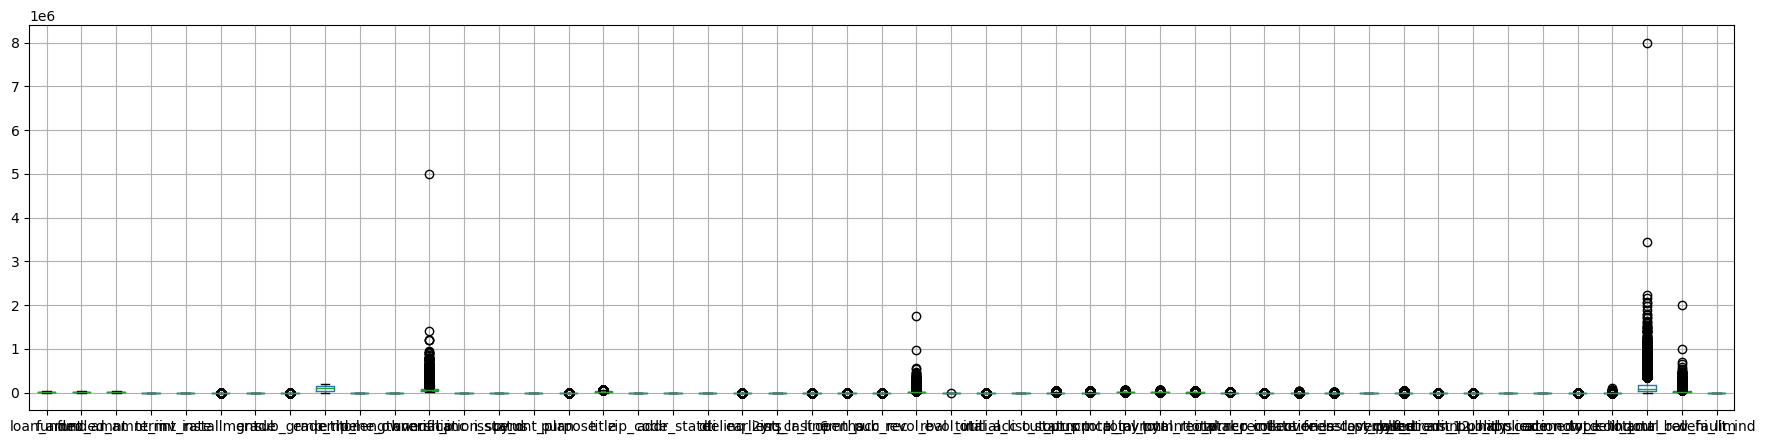

In [187]:
class0_1.boxplot(figsize=(22,5))

# Installment

<AxesSubplot:ylabel='installment'>

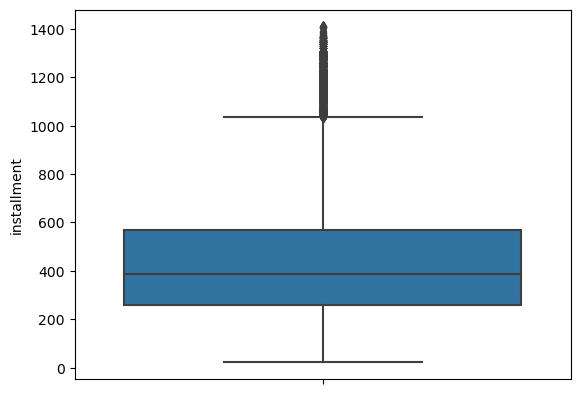

In [188]:
sns.boxplot(data=class0_1,y="installment")

<AxesSubplot:xlabel='installment', ylabel='Density'>

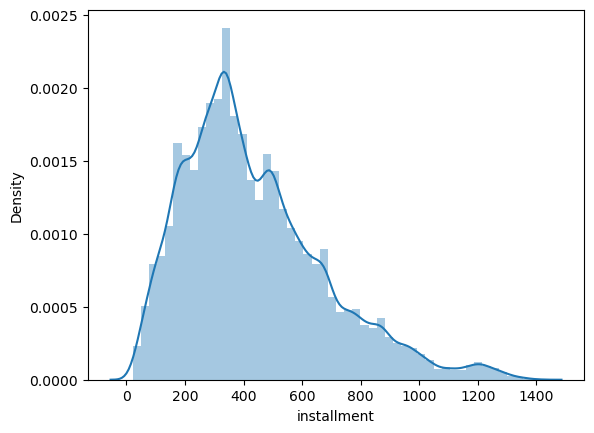

In [189]:
sns.distplot(class0_1.installment)

In [190]:
class0_1.installment.value_counts()

336.90    219
327.34    178
332.72    163
337.47    141
332.10    136
         ... 
136.50      1
259.24      1
199.36      1
172.13      1
388.80      1
Name: installment, Length: 27421, dtype: int64

In [191]:
class0_1.installment.skew()

0.9381783040006912

In [192]:
iqr=class0_1.installment.quantile(0.75)-class0_1.installment.quantile(0.25)
iqr

309.7

In [193]:
lb=class0_1["installment"].quantile(0.25)-(iqr*3)
ub=class0_1["installment"].quantile(0.75)+(iqr*3)
print(lb,ub)

-668.55 1499.35


In [194]:
class0_1.loc[class0_1["installment"]>1492.7999999999997,"installment"]=1492.7999999999997

# Title

<AxesSubplot:ylabel='title'>

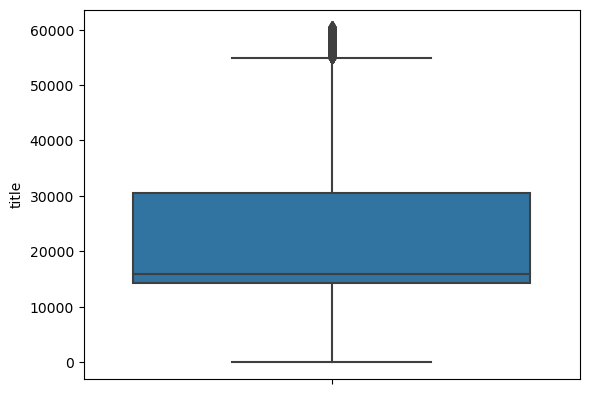

In [195]:
sns.boxplot(data=class0_1,y="title")

In [196]:
class0_1.title.describe()

count    86186.000000
mean     22936.297473
std      14421.881321
min          0.000000
25%      14280.000000
50%      16001.000000
75%      30487.500000
max      60581.000000
Name: title, dtype: float64

<AxesSubplot:xlabel='title', ylabel='Density'>

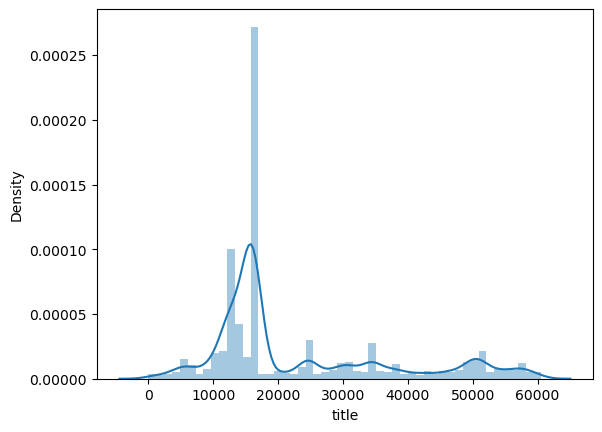

In [197]:
sns.distplot(class0_1.title)

In [198]:
class0_1.title.value_counts()

16001    27529
12597     9359
14280     3310
24694     2383
34394     2346
         ...  
9509         1
26890        1
1167         1
14303        1
19493        1
Name: title, Length: 16532, dtype: int64

In [199]:
class0_1.title.skew()

1.1241713429174909

In [200]:
iqr=class0_1.title.quantile(0.75)-class0_1.title.quantile(0.25)
iqr

16207.5

In [201]:
lb=class0_1["title"].quantile(0.25)-(iqr*3)
ub=class0_1["title"].quantile(0.75)+(iqr*3)
print(lb,ub)

-34342.5 79110.0


In [202]:
class0_1.loc[class0_1["title"]>79643.0,"title"]=79643.0

# Revol_util

<AxesSubplot:ylabel='revol_util'>

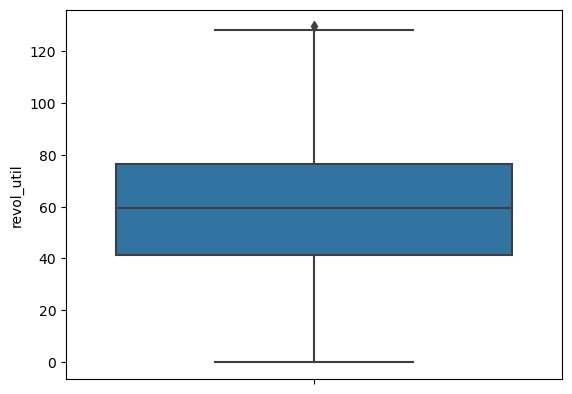

In [203]:
sns.boxplot(data=class0_1,y="revol_util")

<AxesSubplot:xlabel='revol_util', ylabel='Density'>

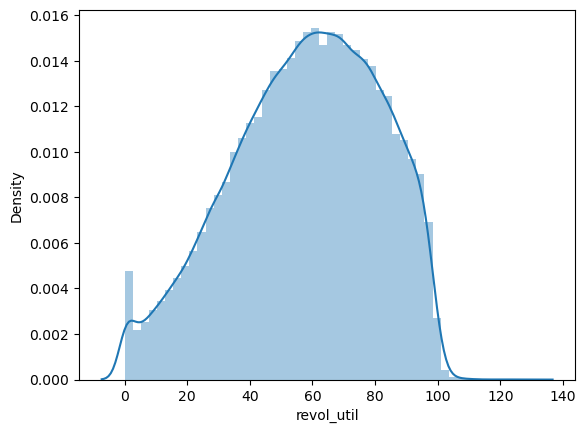

In [204]:
sns.distplot(class0_1.revol_util)

In [205]:
class0_1.revol_util.value_counts()

0.00      473
57.50     205
61.30     176
60.00     166
61.00     166
         ... 
58.19       1
94.46       1
26.32       1
106.40      1
108.90      1
Name: revol_util, Length: 1093, dtype: int64

In [206]:
class0_1.revol_util.skew()

-0.3320710553132154

(array([3.5650e+03, 5.6900e+03, 1.0032e+04, 1.3984e+04, 1.6594e+04,
        1.6435e+04, 1.3423e+04, 6.4120e+03, 4.4000e+01, 7.0000e+00]),
 array([  0.  ,  12.94,  25.88,  38.82,  51.76,  64.7 ,  77.64,  90.58,
        103.52, 116.46, 129.4 ]),
 <BarContainer object of 10 artists>)

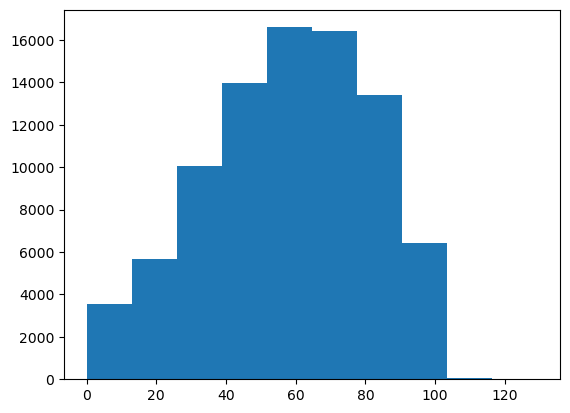

In [207]:
plt.hist(class0_1.revol_util)

In [208]:
upperboundry=class0_1["revol_util"].mean()+3*class0_1["revol_util"].std()
lowerboundry=class0_1["revol_util"].mean()-3*class0_1["revol_util"].std()
print(upperboundry,lowerboundry)

128.49530449438515 -13.061537061160493


In [209]:
class0_1.loc[class0_1["revol_util"]>128.41454686059296,"revol_util"]=128.41454686059296

# Total_acc

<AxesSubplot:ylabel='total_acc'>

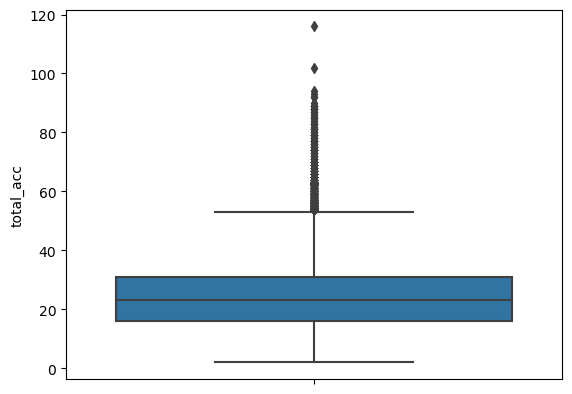

In [210]:
sns.boxplot(data=class0_1,y="total_acc")

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

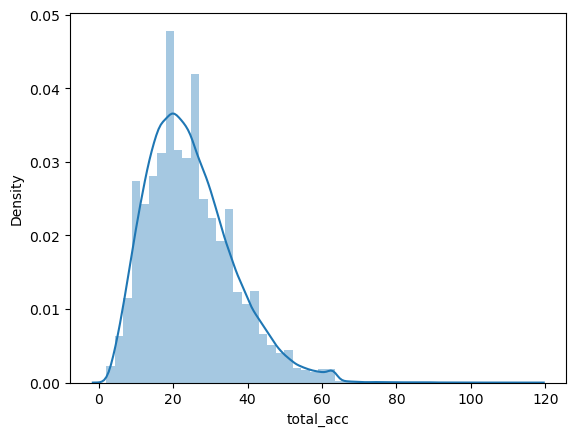

In [211]:
sns.distplot(class0_1.total_acc)

In [212]:
class0_1.total_acc.value_counts()

20.0     3208
19.0     3184
21.0     3129
17.0     3101
22.0     3084
         ... 
82.0        1
93.0        1
116.0       1
90.0        1
94.0        1
Name: total_acc, Length: 94, dtype: int64

In [213]:
class0_1.total_acc.skew()

0.8153529088811676

In [214]:
iqr=class0_1.total_acc.quantile(0.75)-class0_1.total_acc.quantile(0.25)
iqr

15.0

In [215]:
lb=class0_1["total_acc"].quantile(0.25)-(iqr*3)
ub=class0_1["total_acc"].quantile(0.75)+(iqr*3)
print(lb,ub)

-29.0 76.0


In [216]:
class0_1.loc[class0_1["total_acc"]>76.0,"total_acc"]=76.0

# total_pymnt

<AxesSubplot:ylabel='total_pymnt'>

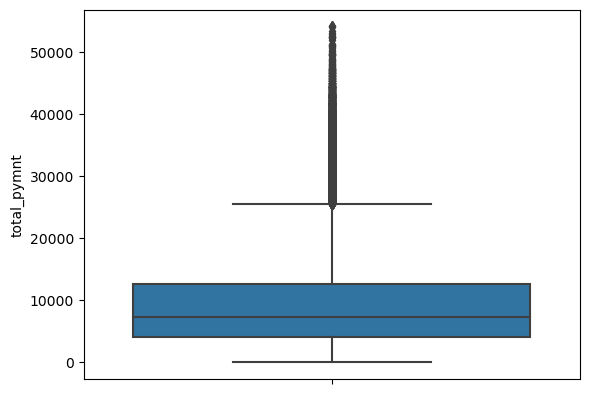

In [217]:
sns.boxplot(data=class0_1,y="total_pymnt")

<AxesSubplot:xlabel='total_pymnt', ylabel='Density'>

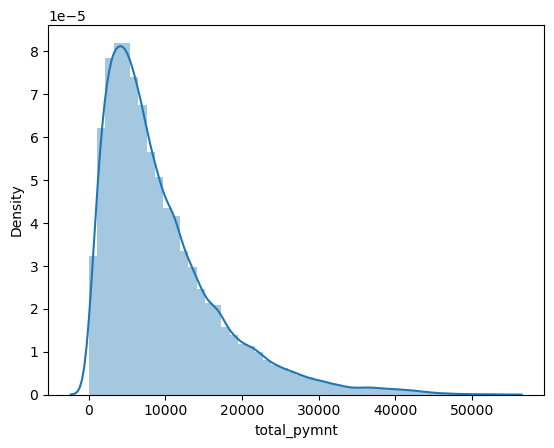

In [218]:
sns.distplot(class0_1.total_pymnt)

In [219]:
class0_1.total_pymnt.value_counts()

0.000000        82
6743.730000     13
5564.780000     13
6064.200000     13
7276.050000     13
                ..
11749.930000     1
41187.248611     1
6076.580000      1
21148.311502     1
2477.890000      1
Name: total_pymnt, Length: 79353, dtype: int64

In [220]:
iqr=class0_1.total_pymnt.quantile(0.75)-class0_1.total_pymnt.quantile(0.25)
iqr

8590.529999999999

In [221]:
class0_1.total_pymnt.skew()

1.6227767020768071

In [222]:
lb=class0_1["total_pymnt"].quantile(0.25)-(iqr*3)
ub=class0_1["total_pymnt"].quantile(0.75)+(iqr*3)
print(lb,ub)

-21757.499999999996 38376.20999999999


In [223]:
class0_1.loc[class0_1["total_pymnt"]>38111.4225,"total_pymnt"]=38111.4225 

# total_pymnt_inv

<AxesSubplot:ylabel='total_pymnt_inv'>

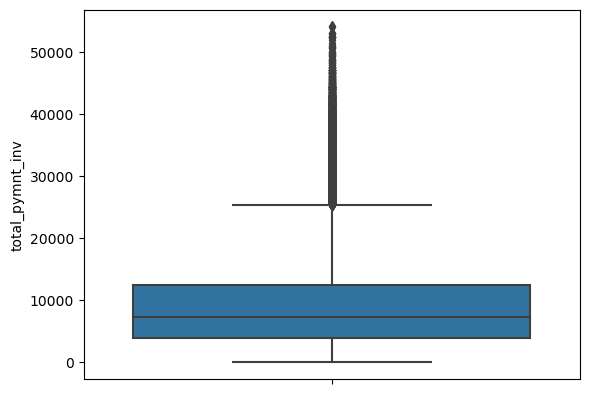

In [224]:
sns.boxplot(data=class0_1,y="total_pymnt_inv")

<AxesSubplot:xlabel='total_pymnt_inv', ylabel='Density'>

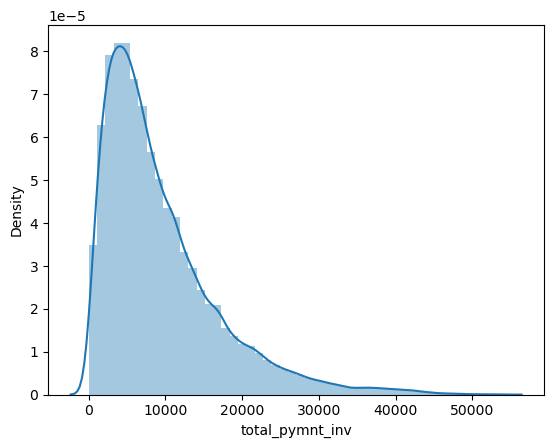

In [225]:
sns.distplot(class0_1.total_pymnt_inv)

In [226]:
class0_1.total_pymnt_inv.value_counts()

0.00        137
7276.05      14
6064.20      13
6743.73      13
5564.78      13
           ... 
6858.59       1
10888.88      1
4926.47       1
13782.42      1
2477.89       1
Name: total_pymnt_inv, Length: 79569, dtype: int64

In [227]:
iqr=class0_1.total_pymnt_inv.quantile(0.75)-class0_1.total_pymnt_inv.quantile(0.25)
iqr

8569.420000000002

In [228]:
lb=class0_1["total_pymnt_inv"].quantile(0.25)-(iqr*3)
ub=class0_1["total_pymnt_inv"].quantile(0.75)+(iqr*3)
print(lb,ub)

-21751.460000000006 38234.48000000001


In [229]:
class0_1.loc[class0_1["total_pymnt_inv"]>37991.97,"total_pymnt_inv"]=37991.97

# Total_rec_prncp

<AxesSubplot:ylabel='total_rec_prncp'>

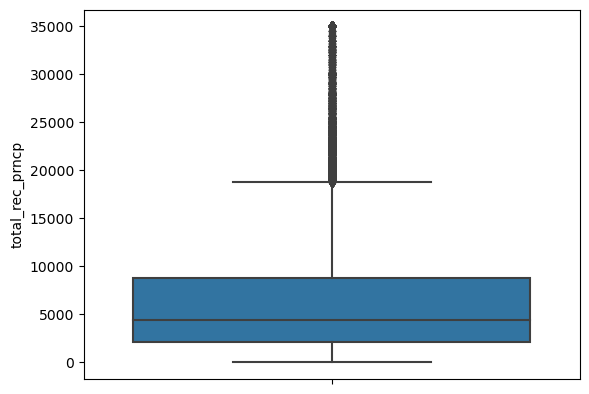

In [230]:
sns.boxplot(data=class0_1,y="total_rec_prncp")

<AxesSubplot:xlabel='total_rec_prncp', ylabel='Density'>

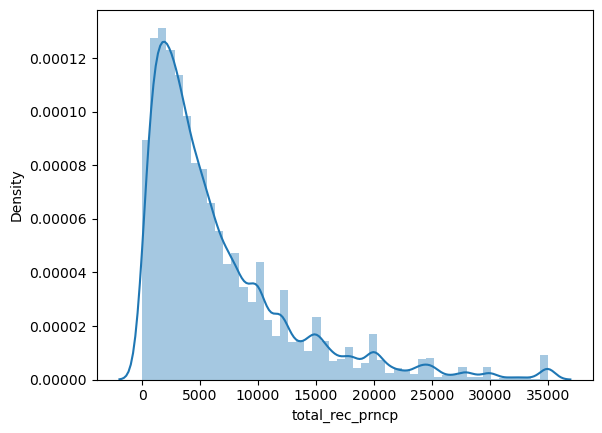

In [231]:
sns.distplot(class0_1.total_rec_prncp)

In [232]:
class0_1.total_rec_prncp.value_counts()

10000.00    1324
12000.00    1100
15000.00     945
20000.00     820
8000.00      686
            ... 
837.79         1
2446.52        1
4054.20        1
2581.77        1
1709.70        1
Name: total_rec_prncp, Length: 59604, dtype: int64

In [233]:
class0_1.total_rec_prncp.skew()

1.8555956252233352

In [234]:
iqr=class0_1.total_rec_prncp.quantile(0.75)-class0_1.total_rec_prncp.quantile(0.25)
iqr

6650.3325

In [235]:
lb=class0_1["total_rec_prncp"].quantile(0.25)-(iqr*3)
ub=class0_1["total_rec_prncp"].quantile(0.75)+(iqr*3)
print(lb,ub)

-17801.38 28750.947500000002


In [236]:
class0_1.loc[class0_1["total_rec_prncp"]>28492.3675,"total_rec_prncp"]=28492.3675

# Total_rec_int

<AxesSubplot:ylabel='total_rec_int'>

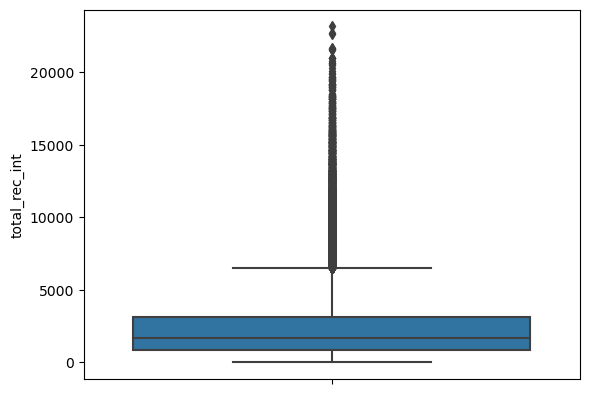

In [237]:
sns.boxplot(data=class0_1,y="total_rec_int")

<AxesSubplot:xlabel='total_rec_int', ylabel='Density'>

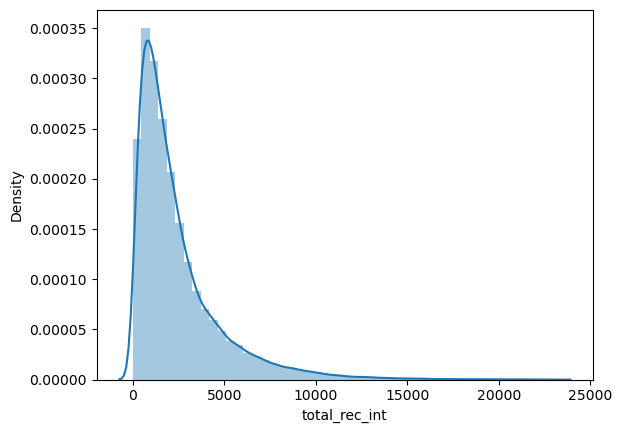

In [238]:
sns.distplot(class0_1.total_rec_int)

In [239]:
class0_1.total_rec_int.value_counts()

0.00       363
1249.39     15
1547.03     13
3447.75     10
1137.79     10
          ... 
3306.83      1
2277.79      1
626.94       1
315.91       1
523.88       1
Name: total_rec_int, Length: 74274, dtype: int64

In [240]:
iqr=class0_1.total_rec_int.quantile(0.75)-class0_1.total_rec_int.quantile(0.25)
iqr

2256.6025

In [241]:
lb=class0_1["total_rec_int"].quantile(0.25)-(iqr*3)
ub=class0_1["total_rec_int"].quantile(0.75)+(iqr*3)
print(lb,ub)

-5909.115 9887.1025


In [242]:
class0_1.loc[class0_1["total_rec_int"]>9886.109999999999,"total_rec_int"]=9886.109999999999

# Tot_cur_bal

<AxesSubplot:ylabel='tot_cur_bal'>

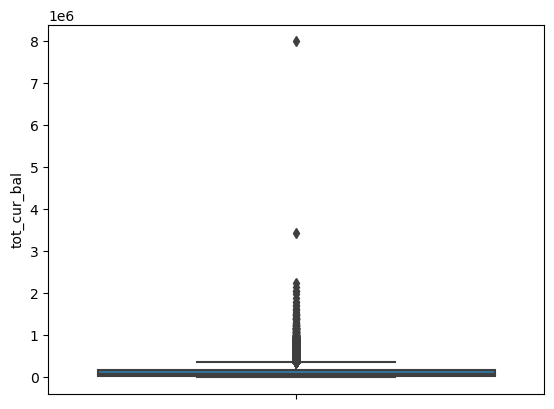

In [243]:
sns.boxplot(data=class0_1,y="tot_cur_bal")

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Density'>

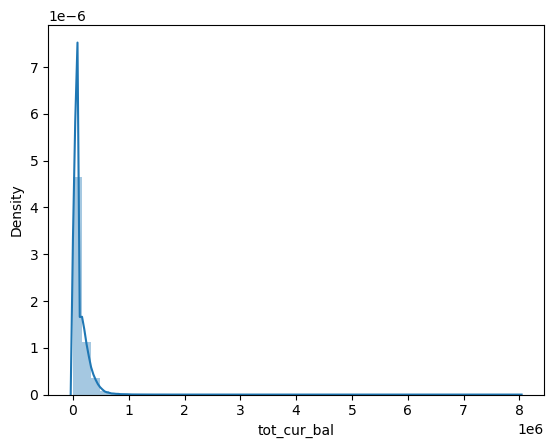

In [244]:
sns.distplot(class0_1.tot_cur_bal)

In [245]:
class0_1.tot_cur_bal.value_counts()

82071.0     16013
0.0            18
13912.0         6
13076.0         6
37642.0         6
            ...  
222859.0        1
370194.0        1
33732.0         1
139031.0        1
42319.0         1
Name: tot_cur_bal, Length: 60053, dtype: int64

In [246]:
class0_1.tot_cur_bal.skew()

5.187671629513773

In [247]:
iqr=class0_1.tot_cur_bal.quantile(0.75)-class0_1.tot_cur_bal.quantile(0.25)
iqr

130663.0

In [248]:
lb=class0_1["tot_cur_bal"].quantile(0.25)-(iqr*3)
ub=class0_1["tot_cur_bal"].quantile(0.75)+(iqr*3)
print(lb,ub)

-358701.75 555939.25


In [249]:
class0_1.loc[class0_1["tot_cur_bal"]>558303.5,"tot_cur_bal"]=558303.5

# Annual_inc

<AxesSubplot:ylabel='annual_inc'>

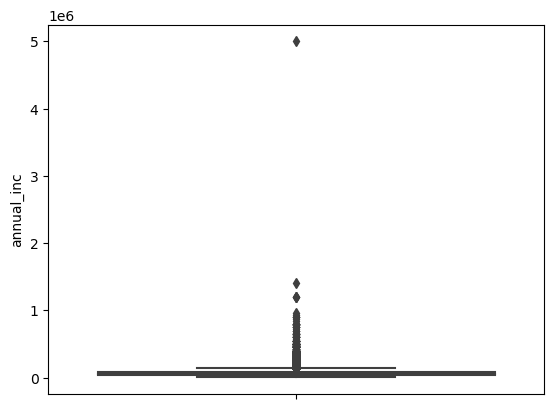

In [250]:
sns.boxplot(data=class0_1,y="annual_inc")

In [251]:
class0_1.annual_inc.describe()

count    8.618600e+04
mean     6.954812e+04
std      4.780089e+04
min      4.080000e+03
25%      4.300000e+04
50%      6.000000e+04
75%      8.400000e+04
max      5.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

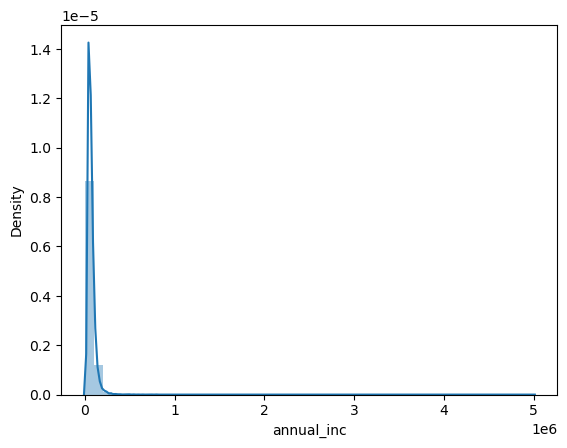

In [252]:
sns.distplot(class0_1.annual_inc)

In [253]:
class0_1.annual_inc.value_counts()

60000.00    3508
50000.00    3102
40000.00    2745
65000.00    2468
45000.00    2411
            ... 
77755.00       1
46614.00       1
35981.00       1
34928.12       1
35075.00       1
Name: annual_inc, Length: 8425, dtype: int64

In [254]:
iqr=class0_1.annual_inc.quantile(0.75)-class0_1.annual_inc.quantile(0.25)
iqr

41000.0

In [255]:
lb=class0_1["annual_inc"].quantile(0.25)-(iqr*3)
ub=class0_1["annual_inc"].quantile(0.75)+(iqr*3)
print(lb,ub)

-80000.0 207000.0


In [256]:
class0_1.loc[class0_1["annual_inc"]>207000.0,"annual_inc"]=207000.0

# Last_pymnt_amnt

<AxesSubplot:ylabel='last_pymnt_amnt'>

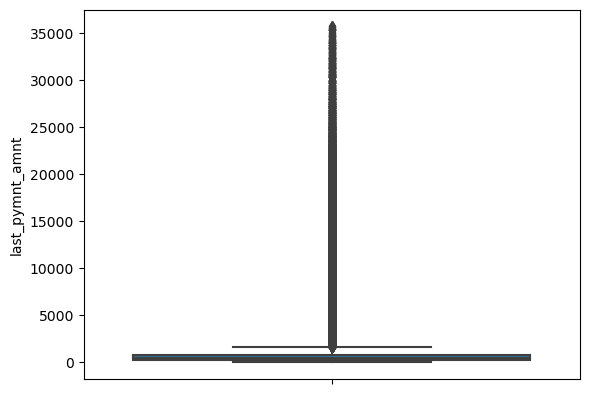

In [257]:
sns.boxplot(data=class0_1 ,y="last_pymnt_amnt")

In [258]:
class0_1.last_pymnt_amnt.describe()

count    86186.000000
mean      1972.520720
std       4427.185169
min          0.000000
25%        276.265000
50%        454.740000
75%        809.712500
max      35757.360000
Name: last_pymnt_amnt, dtype: float64

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Density'>

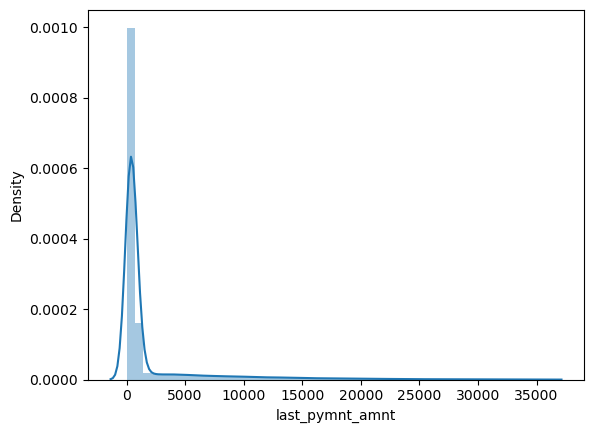

In [259]:
sns.distplot(class0_1.last_pymnt_amnt)

In [260]:
class0_1.last_pymnt_amnt.value_counts()

0.00        364
100.00      201
200.00      175
336.90      168
327.34      141
           ... 
4587.96       1
1828.20       1
12239.40      1
8478.40       1
908.22        1
Name: last_pymnt_amnt, Length: 43846, dtype: int64

In [261]:
iqr=class0_1.last_pymnt_amnt.quantile(0.75)-class0_1.last_pymnt_amnt.quantile(0.25)
iqr

533.4475000000001

In [262]:
lb=class0_1["last_pymnt_amnt"].quantile(0.25)-(iqr*3)
ub=class0_1["last_pymnt_amnt"].quantile(0.75)+(iqr*3)
print(lb,ub)

-1324.0775000000003 2410.0550000000003


In [263]:
class0_1.loc[class0_1["last_pymnt_amnt"]>2422.4750000000004,"last_pymnt_amnt"]=2422.4750000000004

# Total_rev_hi_lim

<AxesSubplot:ylabel='total_rev_hi_lim'>

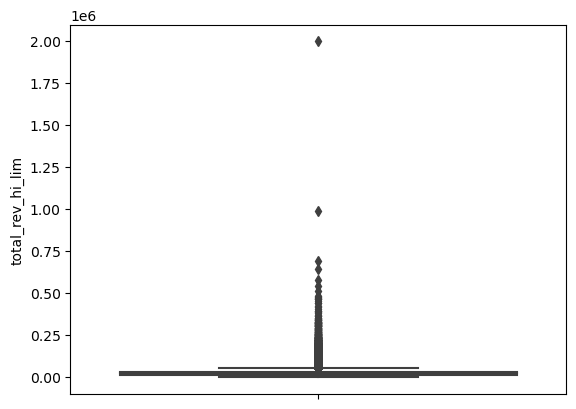

In [264]:
sns.boxplot(data=class0_1,y="total_rev_hi_lim")

In [265]:
class0_1.total_rev_hi_lim.describe()

count    8.618600e+04
mean     2.752701e+04
std      2.485150e+04
min      0.000000e+00
25%      1.500000e+04
50%      2.290000e+04
75%      3.170000e+04
max      1.998700e+06
Name: total_rev_hi_lim, dtype: float64

<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='Density'>

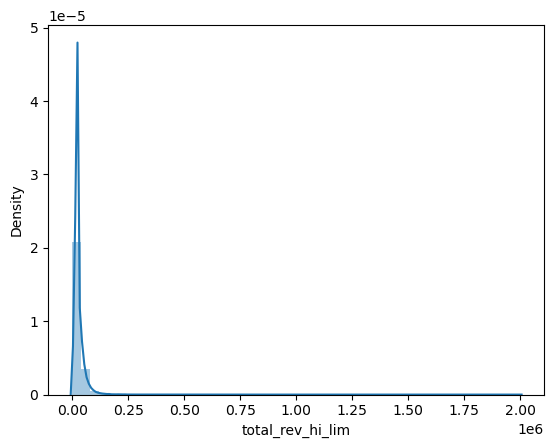

In [266]:
sns.distplot(class0_1.total_rev_hi_lim)

In [267]:
class0_1.total_rev_hi_lim.skew()

10.994798101220786

In [268]:
class0_1.total_rev_hi_lim.value_counts()

22900.0    16147
12700.0      244
9500.0       241
15000.0      237
12000.0      233
           ...  
89575.0        1
58162.0        1
31387.0        1
52229.0        1
19050.0        1
Name: total_rev_hi_lim, Length: 4345, dtype: int64

In [269]:
iqr=class0_1.total_rev_hi_lim.quantile(0.75)-class0_1.total_rev_hi_lim.quantile(0.25)
iqr

16700.0

In [270]:
lb=class0_1["total_rev_hi_lim"].quantile(0.25)-(iqr*3)
ub=class0_1["total_rev_hi_lim"].quantile(0.75)+(iqr*3)
print(lb,ub)

-35100.0 81800.0


In [271]:
class0_1.loc[class0_1["total_rev_hi_lim"]>81800.0,"total_rev_hi_lim"]=81800.0

# Skewness Treatment

In [272]:
class0_1.skew()

loan_amnt                      0.712531
funded_amnt                    0.717454
funded_amnt_inv                0.716168
term                           0.829620
int_rate                       0.221417
installment                    0.938178
grade                          0.493543
sub_grade                      0.497551
emp_title                     -0.019398
emp_length                     0.535610
home_ownership                -0.031993
annual_inc                     1.512502
verification_status           -0.176085
issue_d                       -0.135168
pymnt_plan                     0.000000
purpose                        2.198173
title                          1.124171
zip_code                      -0.003213
addr_state                     0.074564
dti                            0.112697
delinq_2yrs                    5.255985
earliest_cr_line              -0.028285
inq_last_6mths                 1.408740
open_acc                       1.135072
pub_rec                       15.833386


In [273]:
class0_1.loc[class0_1['annual_inc']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind


In [274]:
class0_1.annual_inc=np.log(class0_1.annual_inc)

In [275]:
class0_1.annual_inc.skew()

-0.03422280644846341

In [276]:
class0_1.loc[class0_1['delinq_2yrs']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.0,648,0.0,4.0,0.0,30724.0,90.1,19.0,0,24261.38,24261.38,13994.100000,13994.10,6638.62,7355.48,0.00,0.00,0.0000,40,777.450,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.0,539,0.0,16.0,0.0,19492.0,72.5,53.0,1,0.00,0.00,21411.560000,21411.56,20000.00,1411.56,0.00,0.00,0.0000,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.0,600,4.0,20.0,0.0,30373.0,83.4,39.0,0,0.00,0.00,29049.250000,29049.25,28000.00,1049.25,0.00,0.00,0.0000,70,2422.475,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.0,488,0.0,8.0,0.0,13023.0,79.4,11.0,0,0.00,0.00,13470.639482,13470.64,11200.00,2270.64,0.00,0.00,0.0000,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
247633,2250.0,2250.0,2250.0,0,12.39,75.16,2,10,44911,10,5,11.350407,2,74,0,2,16001,94,33,6.42,0.0,656,0.0,4.0,0.0,1344.0,89.6,5.0,1,1472.13,1472.13,1050.690000,1050.69,777.87,272.82,0.00,0.00,0.0000,40,75.160,41,0.0,1.0,0,0.0,0.0,20582.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449864,25975.0,25975.0,25975.0,0,15.61,908.22,2,13,121666,2,1,11.277203,2,36,0,2,13319,838,4,25.22,0.0,94,1.0,20.0,0.0,8147.0,54.0,49.0,0,0.00,0.00,7826.200000,7826.20,2926.38,1614.04,0.00,3285.78,32.8578,55,908.220,82,0.0,1.0,0,0.0,0.0,300135.0,15100.0,1
449888,10000.0,10000.0,10000.0,1,14.98,237.80,2,12,95392,1,1,11.050890,2,36,0,2,16001,221,44,6.27,0.0,41,1.0,10.0,5.0,6318.0,32.6,22.0,0,0.00,0.00,3631.350000,3631.35,1194.92,1182.31,0.00,1254.12,225.7416,79,237.800,6,0.0,1.0,0,0.0,75.0,148322.0,19400.0,1
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.0,310,1.0,20.0,0.0,37712.0,25.5,54.0,0,0.00,0.00,15222.600000,15222.60,5261.88,4505.60,0.00,5455.12,981.9216,64,697.740,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.0,597,1.0,22.0,1.0,8522.0,76.1,36.0,0,0.00,0.00,5249.430000,5249.43,2698.16,1414.67,15.82,1120.78,201.7404,31,648.580,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1


In [277]:
class0_1.delinq_2yrs=np.sqrt(class0_1.delinq_2yrs)

In [278]:
class0_1.delinq_2yrs.skew()

2.2534155611700886

In [279]:
class0_1.loc[class0_1['inq_last_6mths']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.000000,648,0.0,4.0,0.0,30724.0,90.1,19.0,0,24261.38,24261.38,13994.100000,13994.10,6638.62,7355.48,0.0,0.00,0.0000,40,777.450,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.0,16.0,0.0,19492.0,72.5,53.0,1,0.00,0.00,21411.560000,21411.56,20000.00,1411.56,0.0,0.00,0.0000,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.0,8.0,0.0,13023.0,79.4,11.0,0,0.00,0.00,13470.639482,13470.64,11200.00,2270.64,0.0,0.00,0.0000,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
247633,2250.0,2250.0,2250.0,0,12.39,75.16,2,10,44911,10,5,11.350407,2,74,0,2,16001,94,33,6.42,0.000000,656,0.0,4.0,0.0,1344.0,89.6,5.0,1,1472.13,1472.13,1050.690000,1050.69,777.87,272.82,0.0,0.00,0.0000,40,75.160,41,0.0,1.0,0,0.0,0.0,20582.0,1500.0,0
405471,12000.0,12000.0,12000.0,1,13.65,277.05,2,10,87770,4,5,11.461632,1,6,0,1,12597,534,14,9.16,0.000000,95,0.0,7.0,0.0,14238.0,96.2,14.0,1,8687.24,8687.24,5818.050000,5818.05,3312.76,2505.29,0.0,0.00,0.0000,40,277.050,41,0.0,1.0,0,0.0,0.0,60615.0,14800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449808,29175.0,29175.0,29125.0,1,20.50,781.10,4,20,5820,1,5,11.149355,2,36,0,2,16001,830,4,29.58,1.414214,529,0.0,8.0,0.0,31880.0,82.8,21.0,0,0.00,0.00,7941.940000,7928.34,1462.48,2442.71,0.0,4036.75,40.3675,55,781.100,82,0.0,1.0,0,0.0,0.0,72062.0,38500.0,1
449824,15000.0,15000.0,14950.0,1,14.98,356.70,2,12,177061,1,1,10.645425,1,36,0,2,53382,871,46,17.94,0.000000,594,0.0,11.0,0.0,16206.0,36.7,21.0,0,0.00,0.00,7133.910000,7110.14,3822.63,3311.28,0.0,0.00,0.0000,96,356.700,41,0.0,1.0,0,0.0,0.0,27609.0,44100.0,1
449827,34475.0,34475.0,34425.0,1,14.98,819.80,2,12,183318,3,1,11.141862,2,36,0,4,54529,278,10,14.59,0.000000,202,0.0,17.0,0.0,2787.0,8.4,28.0,0,0.00,0.00,15134.530000,15112.59,5006.72,4828.53,0.0,5299.28,953.8704,39,819.800,59,0.0,1.0,0,0.0,0.0,259171.0,33000.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.0,6.0,0.0,6685.0,94.2,21.0,0,0.00,0.00,2977.090000,2977.09,1144.68,575.62,0.0,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1


In [280]:
class0_1.inq_last_6mths=np.sqrt(class0_1.inq_last_6mths)

In [281]:
class0_1.inq_last_6mths.skew()

0.33573608261331084

In [282]:
class0_1.loc[class0_1['pub_rec']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.000000,648,0.000000,4.0,0.0,30724.0,90.1,19.0,0,24261.38,24261.38,13994.100000,13994.10,6638.62,7355.48,0.0,0.00,0.0000,40,777.450,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,19492.0,72.5,53.0,1,0.00,0.00,21411.560000,21411.56,20000.00,1411.56,0.0,0.00,0.0000,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
449560,35000.0,35000.0,35000.0,0,18.25,1269.73,3,17,186870,5,1,12.043554,1,36,0,4,24694,189,20,4.54,1.414214,541,1.414214,13.0,0.0,13986.0,37.8,33.0,0,13831.70,13831.70,30473.230000,30473.23,21168.30,9304.93,0.0,0.00,0.0000,40,1269.730,41,0.0,1.0,0,0.0,0.0,317137.0,37000.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,30373.0,83.4,39.0,0,0.00,0.00,29049.250000,29049.25,28000.00,1049.25,0.0,0.00,0.0000,70,2422.475,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,13023.0,79.4,11.0,0,0.00,0.00,13470.639482,13470.64,11200.00,2270.64,0.0,0.00,0.0000,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449864,25975.0,25975.0,25975.0,0,15.61,908.22,2,13,121666,2,1,11.277203,2,36,0,2,13319,838,4,25.22,0.000000,94,1.000000,20.0,0.0,8147.0,54.0,49.0,0,0.00,0.00,7826.200000,7826.20,2926.38,1614.04,0.0,3285.78,32.8578,55,908.220,82,0.0,1.0,0,0.0,0.0,300135.0,15100.0,1
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.000000,310,1.000000,20.0,0.0,37712.0,25.5,54.0,0,0.00,0.00,15222.600000,15222.60,5261.88,4505.60,0.0,5455.12,981.9216,64,697.740,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,6685.0,94.2,21.0,0,0.00,0.00,2977.090000,2977.09,1144.68,575.62,0.0,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,15317.0,75.5,32.0,0,0.00,0.00,3894.000000,3894.00,1614.75,918.05,0.0,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1


In [283]:
class0_1.pub_rec=np.sqrt(class0_1.pub_rec)

In [284]:
class0_1.pub_rec.skew()

2.6406029270485707

In [285]:
class0_1.loc[class0_1['revol_bal']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
446752,35000.0,35000.0,35000.00000,0,25.89,1408.13,6,32,191982,6,5,11.289782,2,36,0,6,29901,808,4,0.00,0.000000,427,0.000000,6.0,0.0,0.0,0.0,18.0,0,0.00,0.00,35755.3300,35755.33,28492.3675,755.33,0.0,0.00,0.0000,30,2422.475,31,0.0,1.0,0,0.0,0.0,0.0,7500.0,0
9725,35000.0,35000.0,26581.61762,0,10.59,1139.08,1,6,725,3,1,11.002100,2,11,0,11,5066,707,5,4.60,0.000000,537,1.732051,7.0,0.0,0.0,0.0,29.0,0,0.00,0.00,38111.4225,30009.39,28492.3675,6003.06,0.0,0.00,0.0000,14,1155.660,14,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
343983,25000.0,25000.0,25000.00000,0,16.29,882.51,3,16,9119,9,5,11.626254,2,44,0,2,16001,400,34,14.25,0.000000,428,1.414214,5.0,1.0,0.0,0.0,13.0,1,0.00,0.00,27576.8600,27576.86,25000.0000,2576.86,0.0,0.00,0.0000,64,2422.475,41,0.0,1.0,0,0.0,0.0,96781.0,10500.0,0
23184,6000.0,6000.0,5875.00000,0,6.91,185.02,0,4,37771,1,1,11.002100,2,70,0,2,36314,835,4,11.66,0.000000,535,1.414214,4.0,0.0,0.0,0.0,9.0,0,0.00,0.00,6660.0800,6521.33,6000.0000,660.08,0.0,0.00,0.0000,21,191.080,76,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
354312,13000.0,13000.0,13000.00000,0,11.67,429.74,1,8,187777,4,4,11.512925,2,44,0,4,24694,172,37,0.00,0.000000,650,2.000000,6.0,0.0,0.0,0.0,18.0,0,644.66,644.66,13841.8000,13841.80,12355.3400,1486.46,0.0,0.00,0.0000,40,2422.475,41,0.0,1.0,0,0.0,0.0,298140.0,56800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415577,9400.0,9400.0,9400.00000,0,18.92,344.19,3,18,198619,3,4,11.440355,2,59,0,1,12597,73,30,0.52,1.000000,479,1.000000,0.0,0.0,0.0,57.5,6.0,0,0.00,0.00,3871.6400,3871.64,1657.1700,1096.35,0.0,1118.12,201.2616,79,344.190,6,0.0,1.0,0,0.0,0.0,0.0,0.0,1
427245,8125.0,8125.0,8125.00000,0,24.08,319.11,5,26,186038,1,4,10.463103,2,29,0,2,16001,587,24,0.00,0.000000,659,1.414214,2.0,0.0,0.0,0.0,5.0,1,0.00,0.00,2319.1100,2319.11,2156.0700,163.04,0.0,0.00,0.0000,63,2319.110,66,0.0,1.0,0,0.0,0.0,0.0,5000.0,1
431705,24450.0,24450.0,24450.00000,1,24.50,710.50,5,27,106411,5,5,10.929332,2,29,0,7,30458,279,10,23.61,0.000000,95,0.000000,18.0,0.0,0.0,0.0,29.0,0,0.00,0.00,3544.7800,3544.78,0.0000,0.00,0.0,3544.78,35.4478,24,0.000,49,0.0,1.0,0,0.0,0.0,36583.0,81800.0,1
435552,2000.0,2000.0,2000.00000,0,16.99,71.30,3,15,21640,6,1,11.156251,2,29,0,9,34394,649,35,8.90,1.414214,33,0.000000,9.0,0.0,0.0,0.0,27.0,1,0.00,0.00,499.1000,499.10,313.9700,185.13,0.0,0.00,0.0000,95,71.300,32,0.0,1.0,0,0.0,0.0,205862.0,6500.0,1


In [286]:
class0_1.revol_bal=np.sqrt(class0_1.revol_bal)

In [287]:
class0_1.revol_bal.skew()

1.5744351883377192

In [288]:
class0_1.loc[class0_1['out_prncp']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.0,0.0,21411.560000,21411.56,20000.00,1411.56,0.00,0.00,0.0000,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.0,0.0,29049.250000,29049.25,28000.00,1049.25,0.00,0.00,0.0000,70,2422.475,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.0,0.0,13470.639482,13470.64,11200.00,2270.64,0.00,0.00,0.0000,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
40147,12000.0,12000.0,12000.0,1,18.25,306.36,3,17,106411,10,5,10.491274,1,21,0,2,14280,816,4,14.60,1.000000,267,1.000000,13.0,0.0,67.594378,16.3,34.0,0,0.0,0.0,13405.424541,13405.42,12000.00,1405.42,0.00,0.00,0.0000,95,2422.475,100,0.0,1.0,0,0.0,0.0,46476.0,28100.0,0
164397,7000.0,7000.0,7000.0,0,13.11,236.23,1,8,38450,1,1,10.968198,2,28,0,2,51009,658,42,22.20,0.000000,151,1.414214,9.0,0.0,63.245553,53.3,22.0,1,0.0,0.0,7852.440000,7852.44,7000.00,852.44,0.00,0.00,0.0000,63,2422.475,41,0.0,1.0,0,0.0,55.0,152569.0,7500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.0,0.0,2977.090000,2977.09,1144.68,575.62,0.00,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.0,0.0,3894.000000,3894.00,1614.75,918.05,0.00,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.000000,22.0,1.0,92.314679,76.1,36.0,0,0.0,0.0,5249.430000,5249.43,2698.16,1414.67,15.82,1120.78,201.7404,31,648.580,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.000000,9.0,1.0,87.692645,53.8,31.0,0,0.0,0.0,2481.550000,2481.55,1291.70,523.88,0.00,665.97,119.8746,87,201.740,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [289]:
class0_1.out_prncp=np.sqrt(class0_1.out_prncp)

In [290]:
class0_1.out_prncp.skew()

1.5382299572804883

In [291]:
class0_1.loc[class0_1['out_prncp_inv']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.0,0.0,21411.560000,21411.56,20000.00,1411.56,0.00,0.00,0.0000,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.0,0.0,29049.250000,29049.25,28000.00,1049.25,0.00,0.00,0.0000,70,2422.475,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.0,0.0,13470.639482,13470.64,11200.00,2270.64,0.00,0.00,0.0000,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
40147,12000.0,12000.0,12000.0,1,18.25,306.36,3,17,106411,10,5,10.491274,1,21,0,2,14280,816,4,14.60,1.000000,267,1.000000,13.0,0.0,67.594378,16.3,34.0,0,0.0,0.0,13405.424541,13405.42,12000.00,1405.42,0.00,0.00,0.0000,95,2422.475,100,0.0,1.0,0,0.0,0.0,46476.0,28100.0,0
164397,7000.0,7000.0,7000.0,0,13.11,236.23,1,8,38450,1,1,10.968198,2,28,0,2,51009,658,42,22.20,0.000000,151,1.414214,9.0,0.0,63.245553,53.3,22.0,1,0.0,0.0,7852.440000,7852.44,7000.00,852.44,0.00,0.00,0.0000,63,2422.475,41,0.0,1.0,0,0.0,55.0,152569.0,7500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.0,0.0,2977.090000,2977.09,1144.68,575.62,0.00,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.0,0.0,3894.000000,3894.00,1614.75,918.05,0.00,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.000000,22.0,1.0,92.314679,76.1,36.0,0,0.0,0.0,5249.430000,5249.43,2698.16,1414.67,15.82,1120.78,201.7404,31,648.580,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.000000,9.0,1.0,87.692645,53.8,31.0,0,0.0,0.0,2481.550000,2481.55,1291.70,523.88,0.00,665.97,119.8746,87,201.740,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [292]:
class0_1.out_prncp_inv=np.sqrt(class0_1.out_prncp_inv)

In [293]:
class0_1.out_prncp_inv.skew()

1.538342520754674

In [294]:
class0_1.loc[class0_1['total_pymnt']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.0,7.0,0.000000,76.628976,57.6,11.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.0,10.0,0.000000,181.535121,85.8,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.0,13.0,0.000000,67.416615,18.6,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
6958,2200.0,2200.0,2200.0,1,19.42,57.58,4,22,9385,10,5,11.050890,1,87,0,2,20459,791,4,11.90,0.0,94,1.0,8.0,1.000000,44.877611,83.9,11.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
8696,35000.0,35000.0,34975.0,1,13.99,814.21,2,12,7095,4,1,11.156251,2,87,0,11,42633,688,42,17.73,0.0,421,2.0,6.0,0.000000,119.532422,34.8,16.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410149,11950.0,11950.0,11950.0,0,13.65,406.40,2,10,171306,9,4,11.184421,0,59,0,1,12597,345,41,20.97,0.0,544,1.0,14.0,0.000000,131.483839,87.8,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,142679.0,19700.0,1
422052,20475.0,20475.0,20425.0,0,18.92,749.71,3,18,5820,3,5,11.018809,2,59,0,2,16001,346,41,28.74,0.0,546,0.0,9.0,0.000000,127.314571,80.6,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,58348.0,20100.0,1
431991,8800.0,8800.0,8800.0,0,18.25,319.25,3,17,129987,9,1,11.238489,2,29,0,2,16001,842,4,26.70,1.0,149,0.0,9.0,1.414214,118.692881,71.5,18.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,290564.0,19700.0,1
436854,10975.0,10975.0,10975.0,0,14.98,380.35,2,12,54750,5,4,11.225243,2,36,0,2,16001,830,4,34.34,0.0,480,1.0,14.0,0.000000,240.037497,53.5,35.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,454622.0,81800.0,1


In [295]:
class0_1.total_pymnt=np.sqrt(class0_1.total_pymnt)

In [296]:
class0_1.total_pymnt.skew()

0.5312304037809105

In [297]:
class0_1.loc[class0_1['total_pymnt_inv']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
38400,7500.0,5550.0,0.0,0,8.32,174.74,0,3,82422,0,1,11.314475,2,84,0,9,5167,199,44,4.36,0.0,39,1.732051,7.0,0.000000,161.369142,49.1,25.0,0,0.0,0.0,78.733474,0.0,5550.00,648.96,0.0,0.0,0.0,91,2180.410,96,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38660,5000.0,3125.0,0.0,0,8.63,98.84,0,4,75375,8,5,10.348173,0,60,0,2,37070,55,30,1.92,0.0,194,0.000000,13.0,0.000000,28.530685,3.8,15.0,0,0.0,0.0,59.439970,0.0,3125.00,408.11,0.0,0.0,0.0,83,0.540,90,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38564,2000.0,2000.0,0.0,0,11.97,66.40,2,13,198314,8,1,10.778956,0,38,0,8,55598,59,30,10.40,0.0,147,1.000000,7.0,0.000000,129.406337,69.2,16.0,0,0.0,0.0,49.438851,0.0,1999.99,444.21,0.0,0.0,0.0,93,53.810,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38700,6000.0,6000.0,0.0,0,15.45,209.32,4,24,43390,0,5,10.491274,2,60,0,3,25315,200,44,24.03,0.0,542,1.000000,14.0,0.000000,81.657823,40.9,35.0,0,0.0,0.0,85.268341,0.0,6000.00,1270.69,0.0,0.0,0.0,59,2422.475,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38558,7500.0,7500.0,0.0,0,8.32,236.14,0,3,175797,1,4,10.309086,0,38,0,4,24850,616,18,1.52,0.0,320,0.000000,6.0,0.000000,36.110940,9.7,8.0,0,0.0,0.0,88.767843,0.0,7500.00,379.73,0.0,0.0,0.0,58,2422.475,61,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410149,11950.0,11950.0,11950.0,0,13.65,406.40,2,10,171306,9,4,11.184421,0,59,0,1,12597,345,41,20.97,0.0,544,1.000000,14.0,0.000000,131.483839,87.8,29.0,0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,142679.0,19700.0,1
422052,20475.0,20475.0,20425.0,0,18.92,749.71,3,18,5820,3,5,11.018809,2,59,0,2,16001,346,41,28.74,0.0,546,0.000000,9.0,0.000000,127.314571,80.6,19.0,0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,58348.0,20100.0,1
431991,8800.0,8800.0,8800.0,0,18.25,319.25,3,17,129987,9,1,11.238489,2,29,0,2,16001,842,4,26.70,1.0,149,0.000000,9.0,1.414214,118.692881,71.5,18.0,1,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,290564.0,19700.0,1
436854,10975.0,10975.0,10975.0,0,14.98,380.35,2,12,54750,5,4,11.225243,2,36,0,2,16001,830,4,34.34,0.0,480,1.000000,14.0,0.000000,240.037497,53.5,35.0,0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,454622.0,81800.0,1


In [298]:
class0_1.shape

(86186, 49)

In [299]:
class0_1.total_pymnt_inv=np.sqrt(class0_1.total_pymnt_inv)

In [300]:
class0_1.total_pymnt_inv.skew()

0.5176652117351067

In [301]:
class0_1.loc[class0_1['total_rec_prncp']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.000000,7.0,0.0,76.628976,57.6,11.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.000000,10.0,0.0,181.535121,85.8,31.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3611,6400.0,6400.0,6400.0,1,18.25,163.39,3,19,171607,5,5,10.404263,1,71,0,6,54713,415,34,9.05,0.0,380,1.732051,4.0,0.0,47.296934,60.5,6.0,0,0.0,0.0,19.150718,19.150718,0.0,0.0,0.0,366.75,66.0150,24,0.0,3,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.000000,13.0,0.0,67.416615,18.6,17.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
4204,1800.0,1800.0,1800.0,0,8.90,57.16,0,4,71853,9,5,10.827746,0,71,0,13,46393,802,4,2.64,0.0,596,1.000000,3.0,0.0,43.931765,16.1,10.0,0,0.0,0.0,42.426407,42.426407,0.0,0.0,0.0,1800.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438440,8000.0,8000.0,8000.0,1,15.61,192.90,2,13,21749,6,5,10.915088,2,36,0,9,34394,838,4,18.28,0.0,539,1.000000,9.0,0.0,100.836501,48.7,36.0,1,0.0,0.0,33.564267,33.564267,0.0,0.0,0.0,1126.56,11.2656,24,0.0,58,0.0,1.0,0,0.0,0.0,328842.0,20900.0,1
439603,1875.0,1875.0,1875.0,0,22.40,72.00,4,22,68191,1,4,10.373241,0,36,0,9,34394,751,3,2.10,0.0,158,0.000000,6.0,0.0,40.828911,19.4,7.0,0,0.0,0.0,16.484235,16.484235,0.0,0.0,0.0,271.73,2.7173,24,0.0,14,0.0,1.0,0,0.0,0.0,12222.0,8600.0,1
441802,6625.0,6625.0,6625.0,0,24.08,260.20,5,26,131721,1,1,10.491607,1,36,0,11,5066,2,19,10.60,0.0,36,1.414214,7.0,0.0,111.772090,72.6,30.0,0,0.0,0.0,30.951090,30.951090,0.0,0.0,0.0,957.97,9.5797,24,0.0,58,0.0,1.0,0,0.0,0.0,153419.0,17200.0,1
444627,8000.0,8000.0,8000.0,0,19.97,297.19,3,19,123625,6,1,10.175421,2,36,0,2,16001,602,16,5.85,0.0,377,1.414214,7.0,0.0,48.020829,30.3,11.0,0,0.0,0.0,33.824991,33.824991,0.0,0.0,0.0,1144.13,11.4413,24,0.0,58,0.0,1.0,0,0.0,0.0,97068.0,7600.0,1


In [302]:
class0_1.total_rec_prncp=np.sqrt(class0_1.total_rec_prncp)

In [303]:
class0_1.total_rec_prncp.skew()

0.6639763616002271

In [304]:
class0_1.loc[class0_1['total_rec_int']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.000000,7.0,0.0,76.628976,57.6,11.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.000000,10.0,0.0,181.535121,85.8,31.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3611,6400.0,6400.0,6400.0,1,18.25,163.39,3,19,171607,5,5,10.404263,1,71,0,6,54713,415,34,9.05,0.0,380,1.732051,4.0,0.0,47.296934,60.5,6.0,0,0.0,0.0,19.150718,19.150718,0.0,0.0,0.0,366.75,66.0150,24,0.0,3,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.000000,13.0,0.0,67.416615,18.6,17.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
4204,1800.0,1800.0,1800.0,0,8.90,57.16,0,4,71853,9,5,10.827746,0,71,0,13,46393,802,4,2.64,0.0,596,1.000000,3.0,0.0,43.931765,16.1,10.0,0,0.0,0.0,42.426407,42.426407,0.0,0.0,0.0,1800.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438440,8000.0,8000.0,8000.0,1,15.61,192.90,2,13,21749,6,5,10.915088,2,36,0,9,34394,838,4,18.28,0.0,539,1.000000,9.0,0.0,100.836501,48.7,36.0,1,0.0,0.0,33.564267,33.564267,0.0,0.0,0.0,1126.56,11.2656,24,0.0,58,0.0,1.0,0,0.0,0.0,328842.0,20900.0,1
439603,1875.0,1875.0,1875.0,0,22.40,72.00,4,22,68191,1,4,10.373241,0,36,0,9,34394,751,3,2.10,0.0,158,0.000000,6.0,0.0,40.828911,19.4,7.0,0,0.0,0.0,16.484235,16.484235,0.0,0.0,0.0,271.73,2.7173,24,0.0,14,0.0,1.0,0,0.0,0.0,12222.0,8600.0,1
441802,6625.0,6625.0,6625.0,0,24.08,260.20,5,26,131721,1,1,10.491607,1,36,0,11,5066,2,19,10.60,0.0,36,1.414214,7.0,0.0,111.772090,72.6,30.0,0,0.0,0.0,30.951090,30.951090,0.0,0.0,0.0,957.97,9.5797,24,0.0,58,0.0,1.0,0,0.0,0.0,153419.0,17200.0,1
444627,8000.0,8000.0,8000.0,0,19.97,297.19,3,19,123625,6,1,10.175421,2,36,0,2,16001,602,16,5.85,0.0,377,1.414214,7.0,0.0,48.020829,30.3,11.0,0,0.0,0.0,33.824991,33.824991,0.0,0.0,0.0,1144.13,11.4413,24,0.0,58,0.0,1.0,0,0.0,0.0,97068.0,7600.0,1


In [305]:
class0_1.total_rec_int=np.sqrt(class0_1.total_rec_int)

In [306]:
class0_1.total_rec_int.skew()

0.6838529446363657

In [307]:
class0_1.loc[class0_1['total_rec_late_fee']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.000000,648,0.000000,4.0,0.0,175.282629,90.1,19.0,0,155.760650,155.760650,118.296661,118.296661,81.477727,85.764095,0.0,0.00,0.0000,40,777.450,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.000000,0.000000,146.326894,146.326894,141.421356,37.570733,0.0,0.00,0.0000,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
449560,35000.0,35000.0,35000.0,0,18.25,1269.73,3,17,186870,5,1,12.043554,1,36,0,4,24694,189,20,4.54,1.414214,541,1.414214,13.0,0.0,118.262420,37.8,33.0,0,117.608248,117.608248,174.565833,174.565833,145.493299,96.462065,0.0,0.00,0.0000,40,1269.730,41,0.0,1.0,0,0.0,0.0,317137.0,37000.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.000000,0.000000,170.438405,170.438405,167.332005,32.392129,0.0,0.00,0.0000,70,2422.475,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.000000,0.000000,116.063084,116.063086,105.830052,47.651233,0.0,0.00,0.0000,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.000000,310,1.000000,20.0,0.0,194.195778,25.5,54.0,0,0.000000,0.000000,123.379901,123.379901,72.538817,67.123766,0.0,5455.12,981.9216,64,697.740,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.0,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.0,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.000000,9.0,1.0,87.692645,53.8,31.0,0,0.000000,0.000000,49.815158,49.815158,35.940228,22.888425,0.0,665.97,119.8746,87,201.740,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [308]:
class0_1.total_rec_late_fee=np.sqrt(class0_1.total_rec_late_fee)

In [309]:
class0_1.total_rec_late_fee.skew()

4.9343749741379135

In [310]:
class0_1.loc[class0_1['recoveries']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.000000,648,0.000000,4.0,0.0,175.282629,90.1,19.0,0,155.760650,155.760650,118.296661,118.296661,81.477727,85.764095,0.000000,0.0,0.0,40,777.450,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.000000,0.000000,146.326894,146.326894,141.421356,37.570733,0.000000,0.0,0.0,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
449560,35000.0,35000.0,35000.0,0,18.25,1269.73,3,17,186870,5,1,12.043554,1,36,0,4,24694,189,20,4.54,1.414214,541,1.414214,13.0,0.0,118.262420,37.8,33.0,0,117.608248,117.608248,174.565833,174.565833,145.493299,96.462065,0.000000,0.0,0.0,40,1269.730,41,0.0,1.0,0,0.0,0.0,317137.0,37000.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.000000,0.000000,170.438405,170.438405,167.332005,32.392129,0.000000,0.0,0.0,70,2422.475,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.000000,0.000000,116.063084,116.063086,105.830052,47.651233,0.000000,0.0,0.0,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449798,17625.0,17625.0,17625.0,0,15.61,616.26,2,13,152182,7,1,11.127263,2,36,0,2,29859,855,36,20.79,0.000000,97,0.000000,10.0,1.0,86.619859,95.0,19.0,0,0.000000,0.000000,105.787239,105.787239,85.283703,62.344366,5.550676,0.0,0.0,80,350.000,41,0.0,1.0,0,0.0,0.0,214657.0,7900.0,1
449800,15000.0,15000.0,15000.0,1,17.57,377.41,3,16,177861,8,5,10.596635,2,36,0,2,16001,779,32,14.55,0.000000,432,0.000000,9.0,0.0,133.951484,57.7,16.0,0,0.000000,0.000000,43.439038,43.439038,28.501403,32.781397,0.000000,0.0,0.0,55,377.410,41,0.0,1.0,0,0.0,0.0,17943.0,31100.0,1
449818,14000.0,14000.0,14000.0,0,7.90,438.07,0,3,86814,3,1,10.858999,2,36,0,1,14280,430,15,29.84,0.000000,316,1.414214,7.0,0.0,82.237461,61.5,18.0,0,0.000000,0.000000,78.310536,78.310536,71.099086,32.824686,0.000000,0.0,0.0,64,438.070,41,0.0,1.0,0,0.0,0.0,180454.0,11000.0,1
449824,15000.0,15000.0,14950.0,1,14.98,356.70,2,12,177061,1,1,10.645425,1,36,0,2,53382,871,46,17.94,0.000000,594,0.000000,11.0,0.0,127.302789,36.7,21.0,0,0.000000,0.000000,84.462477,84.321646,61.827421,57.543723,0.000000,0.0,0.0,96,356.700,41,0.0,1.0,0,0.0,0.0,27609.0,44100.0,1


In [311]:
class0_1.recoveries=np.sqrt(class0_1.recoveries)

In [312]:
class0_1.recoveries.skew()

2.0240603549894853

In [313]:
class0_1.loc[class0_1['collection_recovery_fee']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.000000,648,0.000000,4.0,0.0,175.282629,90.1,19.0,0,155.760650,155.760650,118.296661,118.296661,81.477727,85.764095,0.000000,0.0,0.0,40,777.450,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.000000,0.000000,146.326894,146.326894,141.421356,37.570733,0.000000,0.0,0.0,6,2422.475,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
449560,35000.0,35000.0,35000.0,0,18.25,1269.73,3,17,186870,5,1,12.043554,1,36,0,4,24694,189,20,4.54,1.414214,541,1.414214,13.0,0.0,118.262420,37.8,33.0,0,117.608248,117.608248,174.565833,174.565833,145.493299,96.462065,0.000000,0.0,0.0,40,1269.730,41,0.0,1.0,0,0.0,0.0,317137.0,37000.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.000000,0.000000,170.438405,170.438405,167.332005,32.392129,0.000000,0.0,0.0,70,2422.475,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.000000,0.000000,116.063084,116.063086,105.830052,47.651233,0.000000,0.0,0.0,39,382.290,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449798,17625.0,17625.0,17625.0,0,15.61,616.26,2,13,152182,7,1,11.127263,2,36,0,2,29859,855,36,20.79,0.000000,97,0.000000,10.0,1.0,86.619859,95.0,19.0,0,0.000000,0.000000,105.787239,105.787239,85.283703,62.344366,5.550676,0.0,0.0,80,350.000,41,0.0,1.0,0,0.0,0.0,214657.0,7900.0,1
449800,15000.0,15000.0,15000.0,1,17.57,377.41,3,16,177861,8,5,10.596635,2,36,0,2,16001,779,32,14.55,0.000000,432,0.000000,9.0,0.0,133.951484,57.7,16.0,0,0.000000,0.000000,43.439038,43.439038,28.501403,32.781397,0.000000,0.0,0.0,55,377.410,41,0.0,1.0,0,0.0,0.0,17943.0,31100.0,1
449818,14000.0,14000.0,14000.0,0,7.90,438.07,0,3,86814,3,1,10.858999,2,36,0,1,14280,430,15,29.84,0.000000,316,1.414214,7.0,0.0,82.237461,61.5,18.0,0,0.000000,0.000000,78.310536,78.310536,71.099086,32.824686,0.000000,0.0,0.0,64,438.070,41,0.0,1.0,0,0.0,0.0,180454.0,11000.0,1
449824,15000.0,15000.0,14950.0,1,14.98,356.70,2,12,177061,1,1,10.645425,1,36,0,2,53382,871,46,17.94,0.000000,594,0.000000,11.0,0.0,127.302789,36.7,21.0,0,0.000000,0.000000,84.462477,84.321646,61.827421,57.543723,0.000000,0.0,0.0,96,356.700,41,0.0,1.0,0,0.0,0.0,27609.0,44100.0,1


In [314]:
class0_1.collection_recovery_fee=np.sqrt(class0_1.collection_recovery_fee)

In [315]:
class0_1.collection_recovery_fee.skew()

3.359292675909307

In [316]:
class0_1.loc[class0_1['last_pymnt_amnt']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.000000,7.0,0.0,76.628976,57.6,11.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.000000,10.0,0.0,181.535121,85.8,31.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3611,6400.0,6400.0,6400.0,1,18.25,163.39,3,19,171607,5,5,10.404263,1,71,0,6,54713,415,34,9.05,0.0,380,1.732051,4.0,0.0,47.296934,60.5,6.0,0,0.0,0.0,19.150718,19.150718,0.0,0.0,0.0,19.150718,8.124962,24,0.0,3,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.000000,13.0,0.0,67.416615,18.6,17.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
4204,1800.0,1800.0,1800.0,0,8.90,57.16,0,4,71853,9,5,10.827746,0,71,0,13,46393,802,4,2.64,0.0,596,1.000000,3.0,0.0,43.931765,16.1,10.0,0,0.0,0.0,42.426407,42.426407,0.0,0.0,0.0,42.426407,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438440,8000.0,8000.0,8000.0,1,15.61,192.90,2,13,21749,6,5,10.915088,2,36,0,9,34394,838,4,18.28,0.0,539,1.000000,9.0,0.0,100.836501,48.7,36.0,1,0.0,0.0,33.564267,33.564267,0.0,0.0,0.0,33.564267,3.356427,24,0.0,58,0.0,1.0,0,0.0,0.0,328842.0,20900.0,1
439603,1875.0,1875.0,1875.0,0,22.40,72.00,4,22,68191,1,4,10.373241,0,36,0,9,34394,751,3,2.10,0.0,158,0.000000,6.0,0.0,40.828911,19.4,7.0,0,0.0,0.0,16.484235,16.484235,0.0,0.0,0.0,16.484235,1.648423,24,0.0,14,0.0,1.0,0,0.0,0.0,12222.0,8600.0,1
441802,6625.0,6625.0,6625.0,0,24.08,260.20,5,26,131721,1,1,10.491607,1,36,0,11,5066,2,19,10.60,0.0,36,1.414214,7.0,0.0,111.772090,72.6,30.0,0,0.0,0.0,30.951090,30.951090,0.0,0.0,0.0,30.951090,3.095109,24,0.0,58,0.0,1.0,0,0.0,0.0,153419.0,17200.0,1
444627,8000.0,8000.0,8000.0,0,19.97,297.19,3,19,123625,6,1,10.175421,2,36,0,2,16001,602,16,5.85,0.0,377,1.414214,7.0,0.0,48.020829,30.3,11.0,0,0.0,0.0,33.824991,33.824991,0.0,0.0,0.0,33.824991,3.382499,24,0.0,58,0.0,1.0,0,0.0,0.0,97068.0,7600.0,1


In [317]:
class0_1.last_pymnt_amnt=np.sqrt(class0_1.last_pymnt_amnt)

In [318]:
class0_1.last_pymnt_amnt.skew()

0.9245303643820686

In [319]:
class0_1.loc[class0_1['collections_12_mths_ex_med']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.000000,648,0.000000,4.0,0.0,175.282629,90.1,19.0,0,155.760650,155.760650,118.296661,118.296661,81.477727,85.764095,0.000000,0.000000,0.000000,40,27.882790,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.000000,0.000000,146.326894,146.326894,141.421356,37.570733,0.000000,0.000000,0.000000,6,49.218645,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
449560,35000.0,35000.0,35000.0,0,18.25,1269.73,3,17,186870,5,1,12.043554,1,36,0,4,24694,189,20,4.54,1.414214,541,1.414214,13.0,0.0,118.262420,37.8,33.0,0,117.608248,117.608248,174.565833,174.565833,145.493299,96.462065,0.000000,0.000000,0.000000,40,35.633271,41,0.0,1.0,0,0.0,0.0,317137.0,37000.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.000000,0.000000,170.438405,170.438405,167.332005,32.392129,0.000000,0.000000,0.000000,70,49.218645,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.000000,0.000000,116.063084,116.063086,105.830052,47.651233,0.000000,0.000000,0.000000,39,19.552238,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.000000,35.451234,3.545123,55,18.549124,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.000000,36.894444,3.689444,22,7.071068,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.000000,22.0,1.0,92.314679,76.1,36.0,0,0.000000,0.000000,72.452950,72.452950,51.943816,37.612099,3.977436,33.478053,14.203535,31,25.467234,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.000000,9.0,1.0,87.692645,53.8,31.0,0,0.000000,0.000000,49.815158,49.815158,35.940228,22.888425,0.000000,25.806395,10.948726,87,14.203521,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [320]:
class0_1.collections_12_mths_ex_med=np.sqrt(class0_1.collections_12_mths_ex_med)

In [321]:
class0_1.collections_12_mths_ex_med.skew()

12.032488035881038

In [322]:
class0_1.loc[class0_1['acc_now_delinq']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
341849,30900.0,30900.0,30900.0,1,17.57,777.45,3,18,111954,4,1,11.115086,2,44,0,1,12597,534,14,11.79,0.000000,648,0.000000,4.0,0.0,175.282629,90.1,19.0,0,155.760650,155.760650,118.296661,118.296661,81.477727,85.764095,0.000000,0.000000,0.000000,40,27.882790,41,0.0,1.0,0,0.0,131.0,103086.0,34100.0,0
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.000000,0.000000,146.326894,146.326894,141.421356,37.570733,0.000000,0.000000,0.000000,6,49.218645,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
449560,35000.0,35000.0,35000.0,0,18.25,1269.73,3,17,186870,5,1,12.043554,1,36,0,4,24694,189,20,4.54,1.414214,541,1.414214,13.0,0.0,118.262420,37.8,33.0,0,117.608248,117.608248,174.565833,174.565833,145.493299,96.462065,0.000000,0.000000,0.000000,40,35.633271,41,0.0,1.0,0,0.0,0.0,317137.0,37000.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.000000,0.000000,170.438405,170.438405,167.332005,32.392129,0.000000,0.000000,0.000000,70,49.218645,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.000000,0.000000,116.063084,116.063086,105.830052,47.651233,0.000000,0.000000,0.000000,39,19.552238,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.000000,35.451234,3.545123,55,18.549124,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.000000,36.894444,3.689444,22,7.071068,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.000000,22.0,1.0,92.314679,76.1,36.0,0,0.000000,0.000000,72.452950,72.452950,51.943816,37.612099,3.977436,33.478053,14.203535,31,25.467234,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.000000,9.0,1.0,87.692645,53.8,31.0,0,0.000000,0.000000,49.815158,49.815158,35.940228,22.888425,0.000000,25.806395,10.948726,87,14.203521,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [323]:
class0_1.acc_now_delinq=np.sqrt(class0_1.acc_now_delinq)

In [324]:
class0_1.acc_now_delinq.skew()

17.39786653433648

In [325]:
class0_1.loc[class0_1['tot_coll_amt']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
104730,20000.0,20000.0,20000.0,0,11.55,660.00,1,7,173066,9,1,11.156251,1,13,0,2,16001,190,20,11.66,0.000000,539,0.000000,16.0,0.0,139.613753,72.5,53.0,1,0.000000,0.000000,146.326894,146.326894,141.421356,37.570733,0.000000,0.000000,0.000000,6,49.218645,41,0.0,1.0,0,0.0,0.0,158060.0,26900.0,0
449560,35000.0,35000.0,35000.0,0,18.25,1269.73,3,17,186870,5,1,12.043554,1,36,0,4,24694,189,20,4.54,1.414214,541,1.414214,13.0,0.0,118.262420,37.8,33.0,0,117.608248,117.608248,174.565833,174.565833,145.493299,96.462065,0.000000,0.000000,0.000000,40,35.633271,41,0.0,1.0,0,0.0,0.0,317137.0,37000.0,0
159797,28000.0,28000.0,28000.0,0,15.31,974.89,2,11,44516,0,1,11.289782,2,28,0,2,21095,641,35,21.04,0.000000,600,2.000000,20.0,0.0,174.278513,83.4,39.0,0,0.000000,0.000000,170.438405,170.438405,167.332005,32.392129,0.000000,0.000000,0.000000,70,49.218645,74,0.0,1.0,0,0.0,0.0,195532.0,36400.0,0
222725,11200.0,11200.0,11200.0,0,12.42,374.26,1,8,4548,5,5,10.434116,1,34,0,1,11471,65,30,21.21,0.000000,488,0.000000,8.0,0.0,114.118360,79.4,11.0,0,0.000000,0.000000,116.063084,116.063086,105.830052,47.651233,0.000000,0.000000,0.000000,39,19.552238,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
247633,2250.0,2250.0,2250.0,0,12.39,75.16,2,10,44911,10,5,11.350407,2,74,0,2,16001,94,33,6.42,0.000000,656,0.000000,4.0,0.0,36.660606,89.6,5.0,1,38.368346,38.368346,32.414349,32.414349,27.890321,16.517264,0.000000,0.000000,0.000000,40,8.669487,41,0.0,1.0,0,0.0,0.0,20582.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.000000,310,1.000000,20.0,0.0,194.195778,25.5,54.0,0,0.000000,0.000000,123.379901,123.379901,72.538817,67.123766,0.000000,73.858784,31.335628,64,26.414769,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.000000,35.451234,3.545123,55,18.549124,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.000000,36.894444,3.689444,22,7.071068,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.000000,22.0,1.0,92.314679,76.1,36.0,0,0.000000,0.000000,72.452950,72.452950,51.943816,37.612099,3.977436,33.478053,14.203535,31,25.467234,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1


In [326]:
class0_1.tot_coll_amt=np.sqrt(class0_1.tot_coll_amt)

In [327]:
class0_1.tot_coll_amt.skew()

8.259362153729706

In [328]:
class0_1.loc[class0_1['tot_cur_bal']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
446752,35000.0,35000.0,35000.0,0,25.89,1408.13,6,32,191982,6,5,11.289782,2,36,0,6,29901,808,4,0.00,0.0,427,0.000000,6.0,0.0,0.0,0.0,18.0,0,0.000000,0.000000,189.090798,189.090798,168.796823,27.483268,0.000000,0.000000,0.000000,30,49.218645,31,0.0,1.0,0,0.0,0.0,0.0,7500.0,0
449527,5000.0,5000.0,5000.0,0,21.48,189.61,4,21,5820,9,4,10.444532,2,36,0,2,57663,618,18,0.00,0.0,536,0.000000,2.0,0.0,0.0,0.0,14.0,0,45.072719,45.072719,67.454726,67.454726,54.483484,39.770466,0.000000,0.000000,0.000000,40,13.769895,41,0.0,1.0,0,0.0,0.0,0.0,300.0,0
193019,6850.0,6850.0,6850.0,0,15.31,238.50,2,11,106188,10,5,11.289782,2,88,0,2,42100,865,46,0.00,0.0,436,1.732051,3.0,0.0,0.0,0.0,7.0,0,0.000000,0.000000,91.115337,91.115312,82.764727,37.907783,3.872983,0.000000,0.000000,47,49.218645,49,0.0,1.0,0,0.0,0.0,0.0,2500.0,0
194500,2700.0,2700.0,2700.0,0,10.16,87.33,1,5,189925,2,5,10.126631,1,88,0,11,48115,306,9,0.00,0.0,101,1.414214,6.0,0.0,0.0,0.0,7.0,0,0.000000,0.000000,56.049142,56.049175,51.961524,21.012139,0.000000,0.000000,0.000000,96,9.754999,101,0.0,1.0,0,0.0,0.0,0.0,8600.0,0
137863,21000.0,21000.0,21000.0,0,6.03,639.15,0,0,156298,1,4,12.240474,1,65,0,5,53742,821,4,0.00,0.0,301,1.000000,5.0,0.0,0.0,0.0,26.0,1,50.262710,50.262710,143.006363,143.006363,135.917843,44.465267,0.000000,0.000000,0.000000,40,25.281416,41,0.0,1.0,0,0.0,0.0,0.0,10300.0,0
59361,2000.0,2000.0,2000.0,0,23.70,78.16,5,25,36114,10,4,10.126631,0,73,0,9,7034,184,20,0.00,0.0,327,0.000000,2.0,0.0,0.0,0.0,3.0,0,0.000000,0.000000,37.708487,37.708487,25.827892,22.467310,0.000000,15.813602,6.709143,31,8.840814,50,0.0,1.0,0,0.0,0.0,0.0,1800.0,1
97596,28100.0,28100.0,28075.0,0,18.85,1027.91,3,17,81986,3,5,11.362103,2,13,0,9,37924,200,44,0.00,0.0,147,1.414214,8.0,0.0,0.0,0.0,17.0,0,0.000000,0.000000,146.359352,146.294292,109.940438,80.042364,0.000000,54.105268,22.954921,31,32.061036,50,0.0,1.0,0,0.0,0.0,0.0,54968.0,1
100721,1000.0,1000.0,1000.0,0,16.78,35.55,2,14,138386,0,5,11.002100,1,13,0,9,37791,756,3,0.00,0.0,593,1.000000,4.0,0.0,0.0,0.0,23.0,0,0.000000,0.000000,11.888650,11.888650,0.000000,0.000000,0.000000,11.888650,1.188865,24,0.000000,39,0.0,1.0,0,0.0,0.0,0.0,8200.0,1
143002,3900.0,3900.0,3900.0,0,22.47,149.90,4,24,190313,0,5,9.472705,2,5,0,2,16001,401,34,6.44,0.0,44,0.000000,0.0,0.0,0.0,57.5,10.0,0,0.000000,0.000000,40.075803,40.075803,23.852044,23.029980,0.000000,22.511553,9.550843,6,7.120393,59,0.0,1.0,0,0.0,0.0,0.0,0.0,1
173031,7500.0,7500.0,7500.0,0,16.29,264.76,2,13,5820,9,1,10.558414,1,20,0,4,23964,658,42,0.00,1.0,523,1.000000,3.0,1.0,0.0,0.0,12.0,0,0.000000,0.000000,20.744156,20.744156,0.000000,0.000000,0.000000,20.744156,1.982423,24,0.000000,74,0.0,1.0,0,0.0,0.0,0.0,3900.0,1


In [329]:
class0_1.out_prncp_inv=np.sqrt(class0_1.out_prncp_inv)

In [330]:
class0_1.out_prncp_inv.skew()

1.1446246424302764

In [331]:
class0_1.loc[class0_1['total_rev_hi_lim']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
340023,5000.0,5000.0,5000.0,0,19.52,184.60,4,21,151304,1,4,11.532728,2,44,0,9,34394,95,33,2.86,0.000000,261,1.414214,3.0,0.0,0.0,57.5,19.0,0,54.738743,7.398564,56.019639,56.019639,44.762373,33.682785,0.000000,0.000000,0.000000,23,13.586758,41,0.0,1.0,0,0.0,0.000000,322584.0,0.0,0
91252,2700.0,2700.0,2700.0,0,19.52,99.69,3,18,144761,1,1,10.819778,0,89,0,9,34394,162,37,7.80,0.000000,649,1.000000,2.0,0.0,0.0,57.5,8.0,0,27.241145,5.219305,52.829159,52.829159,44.248390,28.861739,0.000000,0.000000,0.000000,40,9.984488,41,0.0,1.0,0,0.0,0.000000,4795.0,0.0,0
50315,2500.0,2500.0,2500.0,0,14.30,85.81,2,10,196548,5,5,10.915088,2,21,0,6,29901,816,4,9.47,1.732051,95,0.000000,2.0,0.0,0.0,57.5,19.0,0,0.000000,0.000000,51.656137,51.656171,50.000000,12.975361,0.000000,0.000000,0.000000,55,47.328110,41,0.0,1.0,0,0.0,0.000000,17668.0,0.0,0
411401,5000.0,5000.0,5000.0,1,19.47,131.00,3,19,180340,1,4,12.128111,1,59,0,4,24694,55,30,0.00,1.414214,35,0.000000,1.0,0.0,0.0,57.5,16.0,1,23.845964,4.883233,75.353567,75.353567,66.568536,35.309914,0.000000,0.000000,0.000000,23,11.445523,41,0.0,1.0,0,0.0,0.000000,393887.0,0.0,0
291777,10500.0,10500.0,10500.0,1,14.99,249.74,2,14,22691,1,1,11.225243,2,82,0,4,24694,307,9,1.28,1.414214,466,0.000000,2.0,0.0,0.0,57.5,32.0,1,92.504432,9.617922,61.205392,61.205392,44.078680,42.463749,0.000000,0.000000,0.000000,40,15.803164,41,0.0,1.0,0,0.0,0.000000,368681.0,0.0,0
178215,7000.0,7000.0,7000.0,0,18.49,254.80,3,16,6631,4,1,11.407565,2,72,0,4,24146,499,23,25.63,1.414214,90,0.000000,3.0,0.0,0.0,57.5,28.0,0,0.000000,0.000000,95.772386,95.772386,83.665943,46.608583,0.000000,0.000000,0.000000,23,15.948354,41,0.0,1.0,0,0.0,0.000000,188625.0,0.0,0
51028,15000.0,15000.0,15000.0,0,16.20,528.84,2,13,156502,1,1,11.004799,2,21,0,2,15964,820,4,20.35,0.000000,146,0.000000,4.0,0.0,0.0,57.5,23.0,0,0.000000,0.000000,123.300081,123.300081,122.474487,14.244648,0.000000,0.000000,0.000000,38,49.218645,50,0.0,1.0,0,0.0,0.000000,308608.0,0.0,0
88256,5000.0,5000.0,5000.0,0,11.55,165.00,1,7,160771,9,1,11.407565,1,89,0,4,4164,671,42,14.73,0.000000,186,1.000000,10.0,0.0,0.0,57.5,37.0,0,37.642529,6.135351,66.735298,66.735298,59.858500,29.505254,0.000000,0.000000,0.000000,23,12.845233,41,0.0,1.0,0,0.0,0.000000,94320.0,0.0,0
387800,14025.0,14025.0,14025.0,0,14.16,480.44,2,11,105081,8,1,11.041321,0,6,0,7,30458,694,42,20.72,0.000000,425,0.000000,3.0,0.0,0.0,57.5,17.0,0,0.000000,0.000000,128.591096,128.591096,118.427193,50.106586,0.000000,0.000000,0.000000,23,49.218645,24,0.0,1.0,0,0.0,0.000000,265321.0,0.0,0
280045,6000.0,6000.0,6000.0,0,16.99,213.89,3,17,115313,7,1,11.482466,1,82,0,2,16001,811,4,4.66,0.000000,147,0.000000,2.0,0.0,0.0,57.5,12.0,1,0.000000,0.000000,84.138041,84.138041,77.459667,32.851332,0.000000,0.000000,0.000000,40,49.218645,41,0.0,1.0,0,0.0,14.142136,507018.0,0.0,0


In [332]:
class0_1.total_rev_hi_lim=np.sqrt(class0_1.total_rev_hi_lim)

In [333]:
class0_1.total_rev_hi_lim.skew()

0.5940053380886867

# Data Spliting

In [334]:
u_x=class0_1.iloc[:,1:-1]
u_y=class0_1.iloc[:,-1]

In [335]:
u_y.head()

341849    0
104730    0
449560    0
159797    0
222725    0
Name: default_ind, dtype: int64

# Feature Selection

In [336]:
rf.fit(u_x,u_y)

RandomForestClassifier()

In [337]:
rf.feature_importances_

array([2.47595208e-02, 2.31003599e-02, 2.49894281e-03, 8.59274194e-03,
       2.18411599e-02, 5.75414320e-03, 5.55037192e-03, 1.60928498e-03,
       8.43982199e-04, 3.14699324e-04, 2.51891616e-03, 9.39198900e-04,
       2.29448387e-03, 0.00000000e+00, 9.75880671e-04, 2.05820540e-03,
       1.43426466e-03, 1.01819196e-03, 2.07740616e-03, 3.43348070e-04,
       1.38963649e-03, 1.04009500e-03, 1.23261012e-03, 2.41633550e-04,
       2.41211446e-03, 1.73607913e-03, 1.41939824e-03, 1.14285182e-03,
       1.30778382e-01, 1.07214671e-01, 3.99848306e-02, 4.68534190e-02,
       1.25668414e-01, 1.73144432e-02, 4.74684795e-03, 1.14247213e-01,
       1.10233861e-01, 5.29930804e-02, 1.05074689e-01, 1.95173794e-02,
       4.13386619e-05, 0.00000000e+00, 0.00000000e+00, 1.71215003e-05,
       3.16335902e-04, 3.12869097e-03, 2.72976229e-03])

In [338]:
df2=pd.DataFrame({"Importances":list(rf.feature_importances_),"Columns":list(u_x)})
df2

,Importances,Columns
0,0.024760,funded_amnt
1,0.023100,funded_amnt_inv
2,0.002499,term
3,0.008593,int_rate
4,0.021841,installment
5,0.005754,grade
6,0.005550,sub_grade
7,0.001609,emp_title
8,0.000844,emp_length
9,0.000315,home_ownership


In [339]:
u_x=u_x.drop(["pymnt_plan","policy_code","application_type","purpose","acc_now_delinq","collections_12_mths_ex_med","home_ownership","emp_length","pub_rec","tot_coll_amt","delinq_2yrs"],axis=1)

In [340]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((68948, 36), (17238, 36), (68948,), (17238,))

# Model building after treating Outliers

# Logistic Regression

In [341]:
lg.fit(u_x_train,u_y_train)

LogisticRegression()

In [342]:
p1=lg.predict(u_x_test)

In [343]:
c1=confusion_matrix(p1,u_y_test)
c1

array([[7787, 1333],
       [ 834, 7284]], dtype=int64)

In [344]:
lg1_f1=f1_score(p1,u_y_test)
lg1_f1

0.8705109052883179

In [345]:
lg1_pe=precision_score(p1,u_y_test)
lg1_pe

0.845305790878496

In [346]:
lg1_re=recall_score(p1,u_y_test)
lg1_re

0.8972653362897265

In [347]:
a1=c1.diagonal().sum()/c1.sum()*100
a1

87.42893607147

In [348]:
print(classification_report(p1,u_y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      9120
           1       0.85      0.90      0.87      8118

    accuracy                           0.87     17238
   macro avg       0.87      0.88      0.87     17238
weighted avg       0.88      0.87      0.87     17238



# ROC Curve

In [349]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,p1)

Text(0.5, 1.0, 'ROC-Curve')

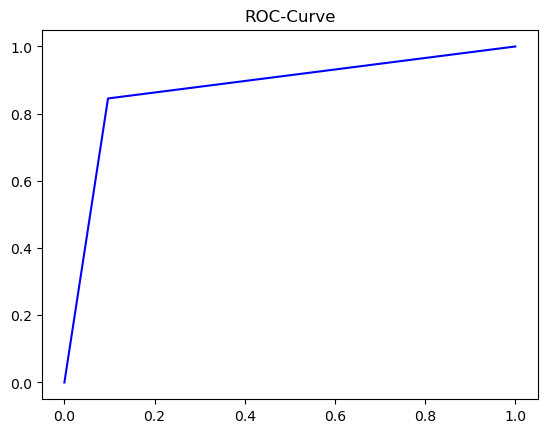

In [350]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Decision Tree

In [351]:
dt.fit(u_x_train,u_y_train)

DecisionTreeClassifier()

In [352]:
dt_p=dt.predict(u_x_test)

In [353]:
dt_c=confusion_matrix(dt_p,u_y_test)
dt_c

array([[8581,   42],
       [  40, 8575]], dtype=int64)

In [354]:
dt1_f1=f1_score(dt_p,u_y_test)
dt1_f1

0.9952414113277623

In [355]:
dt1_pe=precision_score(dt_p,u_y_test)
dt1_pe

0.9951259138911455

In [356]:
dt1_re=recall_score(dt_p,u_y_test)
dt1_re

0.9953569355774812

In [357]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

99.52430676412577

In [358]:
print(classification_report(dt_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8623
           1       1.00      1.00      1.00      8615

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# Random Forest

In [359]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [360]:
rf_p=rf.predict(u_x_test)

In [361]:
rf_c=confusion_matrix(rf_p,u_y_test)
rf_c

array([[8619,   46],
       [   2, 8571]], dtype=int64)

In [362]:
rf1_f1=f1_score(rf_p,u_y_test)
rf1_f1

0.9972076788830716

In [363]:
rf1_pe=precision_score(rf_p,u_y_test)
rf1_pe

0.9946617152141116

In [364]:
rf1_re=recall_score(rf_p,u_y_test)
rf1_re

0.9997667094366033

In [365]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

99.72154542290289

In [366]:
print(classification_report(rf_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8665
           1       0.99      1.00      1.00      8573

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# KNN

In [367]:
knn.fit(u_x_train,u_y_train)

KNeighborsClassifier(n_neighbors=40)

In [368]:
knn_p=knn.predict(u_x_test)

In [369]:
knn_c=confusion_matrix(knn_p,u_y_test)
knn_c

array([[5240, 4208],
       [3381, 4409]], dtype=int64)

In [370]:
k1_f1=f1_score(knn_p,u_y_test)
k1_f1

0.5374535259340525

In [371]:
k1_pe=precision_score(knn_p,u_y_test)
k1_pe

0.5116629917604735

In [372]:
k1_re=recall_score(knn_p,u_y_test)
k1_re

0.565982028241335

In [373]:
knn_ac=knn_c.diagonal().sum()/knn_c.sum()*100
knn_ac

55.975171133542176

In [374]:
print(classification_report(knn_p,u_y_test))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      9448
           1       0.51      0.57      0.54      7790

    accuracy                           0.56     17238
   macro avg       0.56      0.56      0.56     17238
weighted avg       0.56      0.56      0.56     17238



# Support Vector Machine

In [375]:
svc.fit(u_x_train,u_y_train)

SVC()

In [376]:
svc_p=svc.predict(u_x_test)

In [377]:
svc_c=confusion_matrix(svc_p,u_y_test)
svc_c

array([[4098, 3031],
       [4523, 5586]], dtype=int64)

In [378]:
s1_f1=f1_score(svc_p,u_y_test)
s1_f1

0.5966036526754246

In [379]:
s1_pe=precision_score(svc_p,u_y_test)
s1_pe

0.6482534524776604

In [380]:
s1_re=recall_score(svc_p,u_y_test)
s1_re

0.5525769116628747

In [381]:
svc_ac=svc_c.diagonal().sum()/svc_c.sum()*100
svc_ac

56.17821092934216

In [382]:
print(classification_report(svc_p,u_y_test))

              precision    recall  f1-score   support

           0       0.48      0.57      0.52      7129
           1       0.65      0.55      0.60     10109

    accuracy                           0.56     17238
   macro avg       0.56      0.56      0.56     17238
weighted avg       0.58      0.56      0.57     17238



# ADA Boosting

In [383]:
adbo1.fit(u_x_train,u_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [384]:
ad_p=adbo1.predict(u_x_test)

In [385]:
ad_c=confusion_matrix(ad_p,u_y_test)
ad_c

array([[8581,   42],
       [  40, 8575]], dtype=int64)

In [386]:
ad1_f1=f1_score(ad_p,u_y_test)
ad1_f1

0.9952414113277623

In [387]:
ad1_pe=precision_score(ad_p,u_y_test)
ad1_pe

0.9951259138911455

In [388]:
ad1_re=recall_score(ad_p,u_y_test)
ad1_re

0.9953569355774812

In [389]:
ad_ac=ad_c.diagonal().sum()/ad_c.sum()*100
ad_ac

99.52430676412577

In [390]:
print(classification_report(ad_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8623
           1       1.00      1.00      1.00      8615

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# XG Boosting

In [391]:
xgb1.fit(u_x_train,u_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [392]:
xg_p=xgb1.predict(u_x_test)

In [393]:
xg_c=confusion_matrix(xg_p,u_y_test)
xg_c

array([[8621,   26],
       [   0, 8591]], dtype=int64)

In [394]:
xgb1_f1=f1_score(xg_p,u_y_test)
xgb1_f1

0.9984890748489075

In [395]:
xgb1_pe=precision_score(xg_p,u_y_test)
xgb1_pe

0.9969827085992805

In [396]:
xgb1_re=recall_score(xg_p,u_y_test)
xgb1_re

1.0

In [397]:
xg_ac=xg_c.diagonal().sum()/xg_c.sum()*100
xg_ac

99.84917043740573

In [398]:
print(classification_report(xg_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8647
           1       1.00      1.00      1.00      8591

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# Navy Bayes

In [399]:
nb.fit(u_x_train,u_y_train)

MultinomialNB()

In [400]:
nb_p=nb.predict(u_x_test)

In [401]:
nb_c=confusion_matrix(nb_p,u_y_test)
nb_c

array([[3672, 2805],
       [4949, 5812]], dtype=int64)

In [402]:
n1_f1=f1_score(nb_p,u_y_test)
n1_f1

0.5998555062441944

In [403]:
n1_pe=precision_score(nb_p,u_y_test)
n1_pe

0.6744806777300685

In [404]:
n1_re=recall_score(nb_p,u_y_test)
n1_re

0.5400985038565189

In [405]:
nb_ac=nb_c.diagonal().sum()/nb_c.sum()*100
nb_ac

55.017983524770855

In [406]:
print(classification_report(nb_p,u_y_test))

              precision    recall  f1-score   support

           0       0.43      0.57      0.49      6477
           1       0.67      0.54      0.60     10761

    accuracy                           0.55     17238
   macro avg       0.55      0.55      0.54     17238
weighted avg       0.58      0.55      0.56     17238



In [407]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"]
list2=[a1,dt_ac,rf_ac,ad_ac,xg_ac,svc_ac,knn_ac,nb_ac]
list3=[lg1_f1,dt1_f1,rf1_f1,ad1_f1,xgb1_f1,s1_f1,k1_f1,n1_f1]
list4=[lg1_pe,dt1_pe,rf1_pe,ad1_pe,xgb1_pe,s1_pe,k1_pe,n1_pe]
list5=[lg1_re,dt1_re,rf1_re,ad1_re,xgb1_re,s1_re,k1_re,n1_re]

In [408]:
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"F1_Score":list3,"Precision_Score":list4,"Recall_Score":list5})
df1

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,87.428936,0.870511,0.845306,0.897265
1,Decision Tree,99.524307,0.995241,0.995126,0.995357
2,Random Forest,99.721545,0.997208,0.994662,0.999767
3,Ada Boost,99.524307,0.995241,0.995126,0.995357
4,XG Boost,99.849170,0.998489,0.996983,1.000000
5,SVM,56.178211,0.596604,0.648253,0.552577
6,KNN,55.975171,0.537454,0.511663,0.565982
7,Naive Bayes,55.017984,0.599856,0.674481,0.540099


In [409]:
df

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,99.582222,0.978117,0.961772,0.995027
1,Decision Tree,99.875556,0.993590,0.993590,0.993590
2,Random Forest,99.874444,0.993491,0.987066,1.000000
3,Ada Boost,99.883333,0.993990,0.993819,0.994161
4,XG Boost,99.963333,0.998108,0.996223,1.000000
5,SVM,98.840000,0.936812,0.885773,0.994091
6,KNN,92.307778,0.344102,0.207852,0.998900
7,Naive Bayes,79.873333,0.468111,0.912327,0.314823


# Conclusion

#By comparing df and df1 then "Decision tree","Random Forest","Ada Boost","Xg Boost","SVM","KNN","Naive Bayes" these models are over fitted in both the conditions(before and after treating outilers).so here logistic regression is best fitted model.